In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cPickle as cp
import sys
sys.path.append("../../utils")
from misc_utils import expected_loss
import os
from copy import deepcopy
from plotting_performance_vs_metric import get_closeness, get_log_closeness, get_spectrum
from plotting_performance_vs_metric import get_measurement_metric, get_performance_metric, average_results_array

### plot spectrum from nystrom and rff

In [49]:
folder_name = "/dfs/scratch0/zjian/lp_kernel/closeness/fixed_design/rff_noise_sigma_1e5_n_feat_1250_seed_1"
file_name = "spectrum_train_exact.npy"
exact_spectrum = get_spectrum(folder_name, file_name)
print exact_spectrum

[  1.45065875e+04   3.21118353e+02   2.39649583e+02 ...,   1.57966204e-08
   1.49209260e-08   4.03516664e-18]


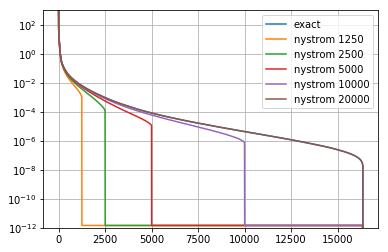

In [50]:
n_nystrom_feat = [1250, 2500, 5000, 10000, 20000]
general_folder = "/dfs/scratch0/zjian/lp_kernel/closeness/fixed_design"
plt.figure()
plt.semilogy(exact_spectrum, label="exact")
for n_feat in n_nystrom_feat:
    folder_name = general_folder + "/nystrom_noise_sigma_1e4_n_feat_" + str(n_feat) + "_seed_1"

#     folder_name = general_folder + "/census_type_nystrom_l2_reg_0.0_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_0.5_seed_1"
    file_name = "spectrum_train.npy"
    spectrum = get_spectrum(folder_name, file_name)
    plt.semilogy(spectrum, label="nystrom " + str(n_feat) )
    
plt.grid()
plt.ylim([1e-12, 1e3] )
plt.legend()
plt.show()

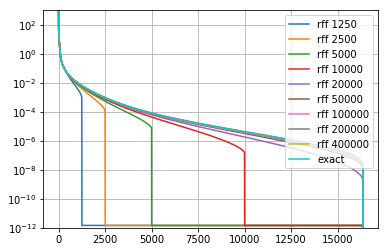

In [51]:
n_rff_feat = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
general_folder = "/dfs/scratch0/zjian/lp_kernel/closeness/fixed_design"
plt.figure()
for n_feat in n_rff_feat:
    folder_name = general_folder + "/rff_noise_sigma_1e5_n_feat_" + str(n_feat) + "_seed_1"
    file_name = "spectrum_train.npy"
    spectrum = get_spectrum(folder_name, file_name)
    plt.semilogy(spectrum, label="rff " + str(n_feat) )
    
plt.semilogy(exact_spectrum, label="exact")

    
plt.grid()
plt.ylim([1e-12, 1e3] )
plt.legend()
plt.show()

### plot performance v.s. approximation error

In [52]:
EPS = 1e-20

In [53]:
def plot_l2_vs_measurement(lamb=0.0, sigma=0.0, seeds=[1,]):
    n_rff_feat = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
    general_folder_measurement = "/dfs/scratch0/zjian/lp_kernel/closeness/fixed_design"
    general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/closeness/fixed_design"
    general_folder_delta = "/dfs/scratch0/zjian/lp_kernel/delta/fixed_design"
    # plt.figure()
    f_norm_list_rff = []
    spectral_norm_list_rff = []
    closeness_list_rff = []
    log_closeness_list_rff = []
    test_loss_list_rff = []
    l2_loss_list_rff = []
    delta_list_rff = []
    
    for seed in seeds:
        f_norm_list = []
        spectral_norm_list = []
        closeness_list = []
        log_closeness_list = []
        l2_loss_list = []
        delta_list = []
        for n_feat in n_rff_feat:
            folder_name = general_folder_measurement + "/rff_noise_sigma_" + str(sigma) + "_n_feat_" + str(n_feat) + "_seed_" + str(seed)
            file_name = "spectrum_train.npy"
            spectrum = get_spectrum(folder_name, file_name)

            file_name = "spectrum_train_exact.npy"
            exact_spectrum = get_spectrum(folder_name, file_name)
            
            file_name = "metric_sample_train.txt"
            metric_name = "F_norm_error"
            f_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
            f_norm_list.append(f_norm_error)

            metric_name = "spectral_norm_error"
            spectral_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
            spectral_norm_list.append(spectral_norm_error)

            closeness = get_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
            closeness_list.append(closeness)

            log_closeness = get_log_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
            log_closeness_list.append(log_closeness)   

            folder_name = general_folder_performance + "/rff_noise_sigma_" + str(sigma) + "_n_feat_" + str(n_feat) + "_seed_" + str(seed)
            file_name = "eval_metric.txt"
            l2_loss = get_performance_metric(folder_name, file_name, min_best=True)
            l2_loss_list.append(l2_loss)
            
            folder_name = general_folder_delta + "/rff_noise_sigma_" + str(sigma) + "_n_feat_" + str(n_feat) + "_seed_" + str(seed)
            file_name = "metric_sample_train.txt"
            metric_name = "Delta"
            delta = get_measurement_metric(folder_name, file_name, metric_name)
            delta_list.append(delta)
        
#         print "inner ", delta_list
        
        f_norm_list_rff.append(np.array(deepcopy(f_norm_list) ) )
        spectral_norm_list_rff.append(np.array(deepcopy(spectral_norm_list) ) )
        closeness_list_rff.append(np.array(deepcopy(closeness_list) ) )
        log_closeness_list_rff.append(np.array(deepcopy(log_closeness_list) ) )
        l2_loss_list_rff.append(np.array(deepcopy(l2_loss_list) ) )
        delta_list_rff.append(np.array(deepcopy(delta_list) ) )
        
        print "rff seed ", seed, delta_list_rff
        
                
    f_norm_list_rff = average_results_array(f_norm_list_rff)
    spectral_norm_list_rff = average_results_array(spectral_norm_list_rff)
    closeness_list_rff = average_results_array(closeness_list_rff)
    log_closeness_list_rff = average_results_array(log_closeness_list_rff)
    l2_loss_list_rff = average_results_array(l2_loss_list_rff)
    delta_list_rff = average_results_array(delta_list_rff)


    # get info for nystrom method
    n_nystrom_feat = [1250, 2500, 5000, 10000, 20000]
    general_folder_measurement = "/dfs/scratch0/zjian/lp_kernel/closeness/fixed_design"
    general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/closeness/fixed_design"
    # plt.figure()
    f_norm_list_nystrom = []
    spectral_norm_list_nystrom = []
    closeness_list_nystrom = []
    log_closeness_list_nystrom = []
    l2_loss_list_nystrom = []
    delta_list_nystrom = []
    for seed in seeds:
        f_norm_list = []
        spectral_norm_list = []
        closeness_list = []
        log_closeness_list = []
        l2_loss_list = []
        delta_list = []
        for n_feat in n_nystrom_feat:
            folder_name = general_folder_measurement + "/nystrom_noise_sigma_" + str(sigma) + "_n_feat_" + str(n_feat) + "_seed_" + str(seed)
            file_name = "spectrum_train.npy"
            spectrum = get_spectrum(folder_name, file_name)

            file_name = "spectrum_train_exact.npy"
            exact_spectrum = get_spectrum(folder_name, file_name)
            
            file_name = "metric_sample_train.txt"
            metric_name = "F_norm_error"
            f_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
            f_norm_list.append(f_norm_error)

            metric_name = "spectral_norm_error"
            spectral_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
            spectral_norm_list.append(spectral_norm_error)

            closeness = get_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
            closeness_list.append(closeness)

            log_closeness = get_log_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
            log_closeness_list.append(log_closeness)    

            folder_name = general_folder_performance + "/nystrom_noise_sigma_" + str(sigma) + "_n_feat_" + str(n_feat) + "_seed_" + str(seed)
            file_name = "eval_metric.txt"
            l2_loss = get_performance_metric(folder_name, file_name, min_best=True)
            l2_loss_list.append(l2_loss)
            
            folder_name = general_folder_delta + "/nystrom_noise_sigma_" + str(sigma) + "_n_feat_" + str(n_feat) + "_seed_" + str(seed)
            file_name = "metric_sample_train.txt"
            metric_name = "Delta"
            delta = get_measurement_metric(folder_name, file_name, metric_name)
            delta_list.append(delta)

        f_norm_list_nystrom.append(np.array(deepcopy(f_norm_list) ) )
        spectral_norm_list_nystrom.append(np.array(deepcopy(spectral_norm_list) ) )
        closeness_list_nystrom.append(np.array(deepcopy(closeness_list) ) )
        log_closeness_list_nystrom.append(np.array(deepcopy(log_closeness_list) ) )
        l2_loss_list_nystrom.append(np.array(deepcopy(l2_loss_list) ) )
        delta_list_nystrom.append(np.array(deepcopy(delta_list) ) )

        print "nystrom seed ", seed, delta_list_nystrom

        
    f_norm_list_nystrom = average_results_array(f_norm_list_nystrom)
    spectral_norm_list_nystrom = average_results_array(spectral_norm_list_nystrom)
    closeness_list_nystrom = average_results_array(closeness_list_nystrom)
    log_closeness_list_nystrom = average_results_array(log_closeness_list_nystrom)
    l2_loss_list_nystrom = average_results_array(l2_loss_list_nystrom)
    delta_list_nystrom = average_results_array(delta_list_nystrom)

    
    plt.figure()
    plt.plot(f_norm_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(f_norm_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title("l2 vs f norm")
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()

    plt.figure()
    plt.plot(spectral_norm_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(spectral_norm_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title("l2 vs spectral norm")
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()

    plt.figure()
    plt.plot(closeness_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(closeness_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title("l2 vs closeness")
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()

    plt.figure()
    plt.plot(log_closeness_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(log_closeness_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title("l2 vs log closeness")
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()
        
    plt.figure()
    plt.plot(delta_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(delta_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title("l2 vs delta")
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()

In [54]:
# label noise sigma     lambda
# 1e3                   1.76055378e-06
# 1e4                   0.00431012
# 1e2                   0.0
# 1e5                   1.04123522

rff seed  1 [array([ 134.88675921,   67.56880951,   33.86578765,   17.23361215,
          7.69179491,    2.45418945,    1.49962025,    0.87362085,
          0.54181594])]
rff seed  2 [array([ 134.88675921,   67.56880951,   33.86578765,   17.23361215,
          7.69179491,    2.45418945,    1.49962025,    0.87362085,
          0.54181594]), array([ 56.91970446,  39.72925164,  24.6269306 ,  12.67216493,
         5.72168002,   3.50520293,   1.78492604,   0.94610938,   0.53345195])]
rff seed  3 [array([ 134.88675921,   67.56880951,   33.86578765,   17.23361215,
          7.69179491,    2.45418945,    1.49962025,    0.87362085,
          0.54181594]), array([ 56.91970446,  39.72925164,  24.6269306 ,  12.67216493,
         5.72168002,   3.50520293,   1.78492604,   0.94610938,   0.53345195]), array([ 78.30735626,  49.16118622,  24.69430677,  12.57320729,
         6.36892415,   2.37390178,   1.4946692 ,   1.01865926,   0.59506   ])]
nystrom seed  1 [array([ 1.        ,  1.        ,  0.99999999

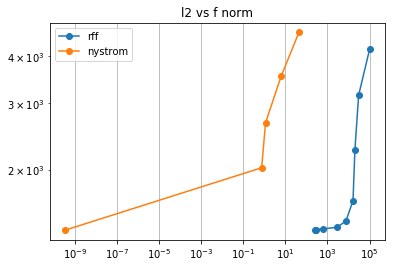

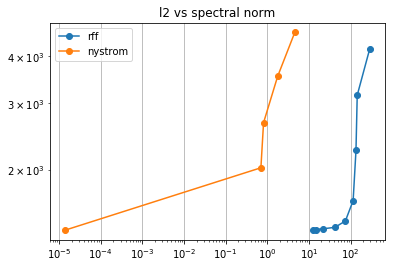

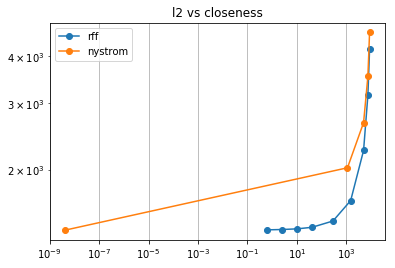

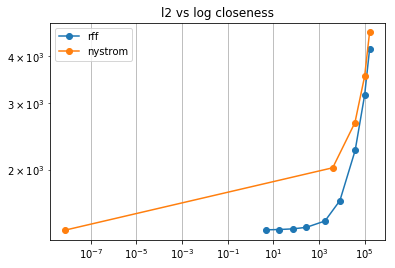

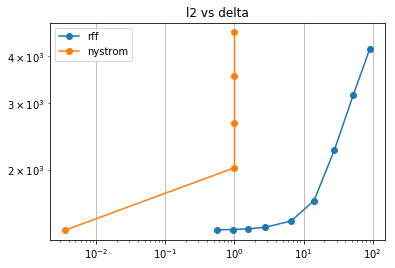

In [55]:
plot_l2_vs_measurement(lamb=1.76055378e-06, sigma="1e3", seeds=[1,2,3])

rff seed  1 [array([ 10.19020176,   5.57153174,   2.78344447,   1.45700884,
         0.79006163,   0.41872786,   0.28056113,   0.19546079,   0.13456866])]
rff seed  2 [array([ 10.19020176,   5.57153174,   2.78344447,   1.45700884,
         0.79006163,   0.41872786,   0.28056113,   0.19546079,   0.13456866]), array([ 5.81248255,  3.48308451,  2.31800234,  1.3252818 ,  0.7842326 ,
        0.47081903,  0.29460487,  0.19552802,  0.13553937])]
rff seed  3 [array([ 10.19020176,   5.57153174,   2.78344447,   1.45700884,
         0.79006163,   0.41872786,   0.28056113,   0.19546079,   0.13456866]), array([ 5.81248255,  3.48308451,  2.31800234,  1.3252818 ,  0.7842326 ,
        0.47081903,  0.29460487,  0.19552802,  0.13553937]), array([ 6.05964342,  3.56890888,  2.02121294,  1.1558274 ,  0.76669259,
        0.42025698,  0.28748879,  0.19270272,  0.13637155])]
nystrom seed  1 [array([  9.96217638e-01,   9.91246484e-01,   9.38440579e-01,
         8.09851288e-01,   5.01684407e-06])]
nystrom seed 

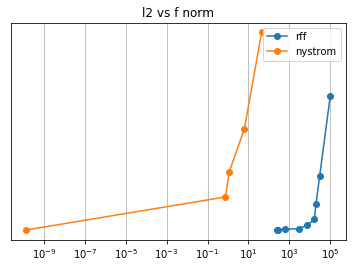

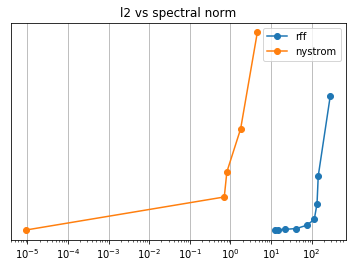

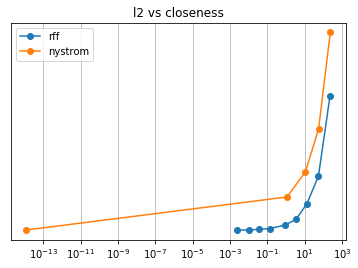

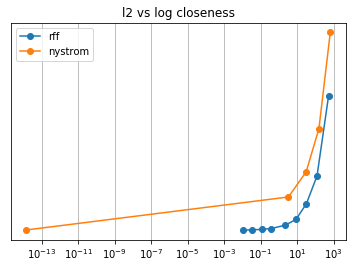

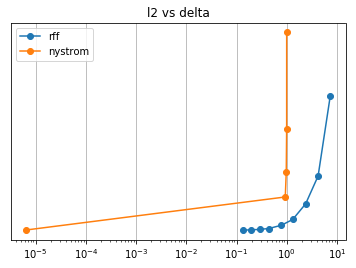

In [56]:
plot_l2_vs_measurement(lamb=0.00431012, sigma="1e4", seeds=[1,2,3])

rff seed  1 [array([ 0.79096907,  0.49444492,  0.32893209,  0.22505153,  0.1467682 ,
        0.08925497,  0.06506212,  0.04551325,  0.03192713])]
rff seed  2 [array([ 0.79096907,  0.49444492,  0.32893209,  0.22505153,  0.1467682 ,
        0.08925497,  0.06506212,  0.04551325,  0.03192713]), array([ 0.67910745,  0.44309093,  0.30828738,  0.21820047,  0.14292289,
        0.09031477,  0.06362991,  0.04539522,  0.03201291])]
rff seed  3 [array([ 0.79096907,  0.49444492,  0.32893209,  0.22505153,  0.1467682 ,
        0.08925497,  0.06506212,  0.04551325,  0.03192713]), array([ 0.67910745,  0.44309093,  0.30828738,  0.21820047,  0.14292289,
        0.09031477,  0.06362991,  0.04539522,  0.03201291]), array([ 0.69523389,  0.43848514,  0.32421912,  0.22072954,  0.15589469,
        0.09568705,  0.06363507,  0.04457678,  0.03208673])]
nystrom seed  1 [array([  6.65787363e-01,   4.56054906e-01,   2.60138260e-01,
         8.38865054e-02,   2.76249202e-08])]
nystrom seed  2 [array([  6.65787363e-01

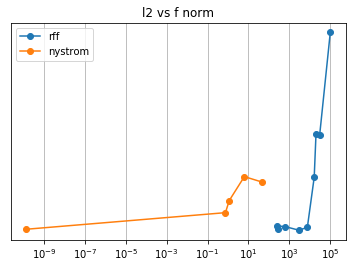

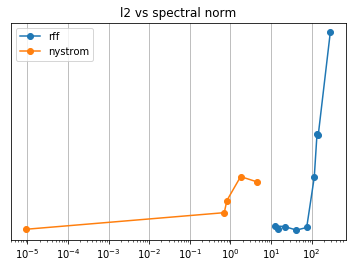

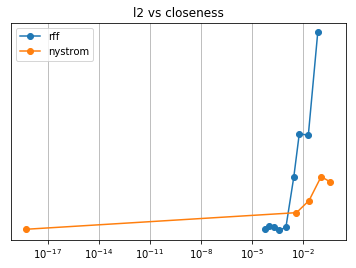

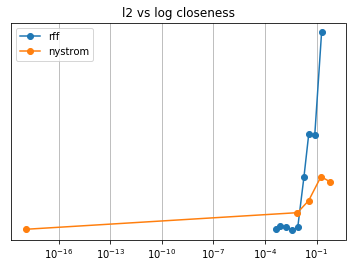

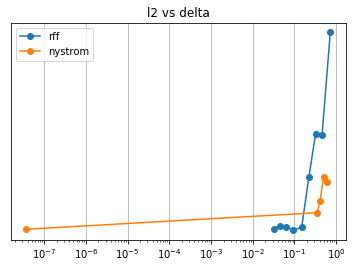

In [57]:
plot_l2_vs_measurement(lamb=1.04123522, sigma="1e5", seeds=[1, 2, 3])

### below are all old code

In [82]:
# plot_l2_vs_measurement(lamb=0, sigma="1e2")

/dfs/scratch0/zjian/lp_kernel/closeness/fixed_design/rff_noise_sigma_1e5_n_feat_400000_seed_1 eval_metric.txt  is not found.


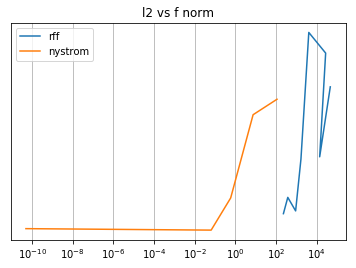

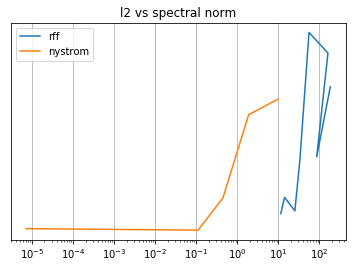

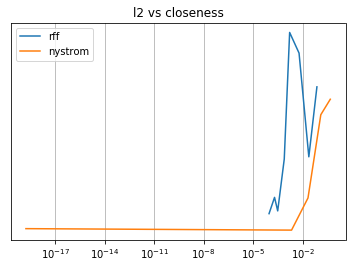

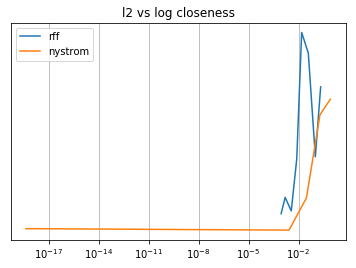

In [83]:
plot_l2_vs_measurement(lamb=1.04123522, sigma="1e5")

### old plots

/dfs/scratch0/zjian/lp_kernel/from_star_cluster/nystrom_vs_rff/census_type_rff_l2_reg_0.001_n_fp_feat_1600000_opt_sgd_lr_0.5_seed_1 eval_metric.txt  is not found.
/dfs/scratch0/zjian/lp_kernel/from_star_cluster/nystrom_vs_rff/census_type_nystrom_l2_reg_0.001_n_fp_feat_20000_opt_sgd_lr_0.5_seed_1 eval_metric.txt  is not found.


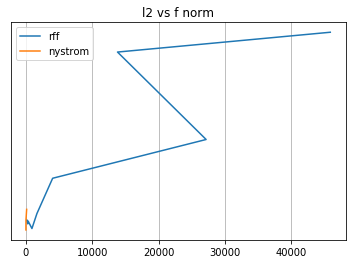

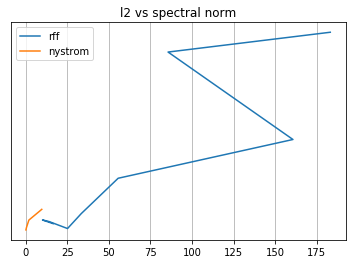

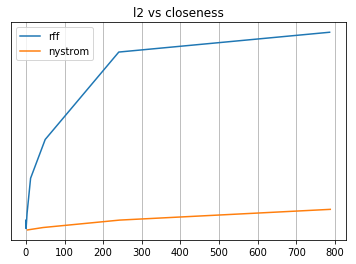

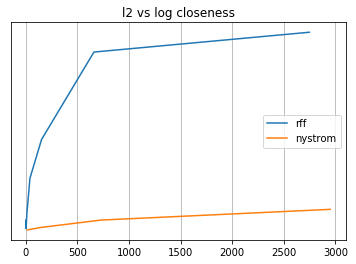

In [221]:
plot_l2_vs_measurement(lamb="0.001")

/dfs/scratch0/zjian/lp_kernel/from_star_cluster/nystrom_vs_rff/census_type_rff_l2_reg_0.01_n_fp_feat_1600000_opt_sgd_lr_0.5_seed_1 eval_metric.txt  is not found.
/dfs/scratch0/zjian/lp_kernel/from_star_cluster/nystrom_vs_rff/census_type_nystrom_l2_reg_0.01_n_fp_feat_20000_opt_sgd_lr_0.5_seed_1 eval_metric.txt  is not found.


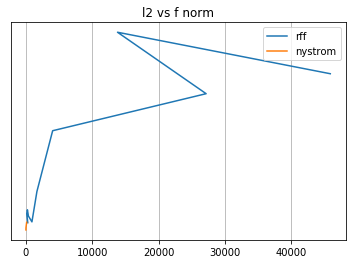

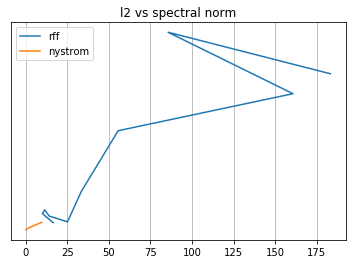

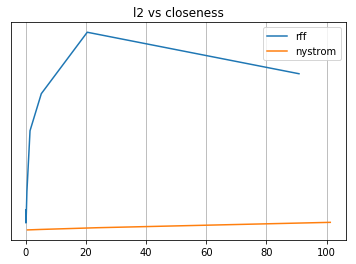

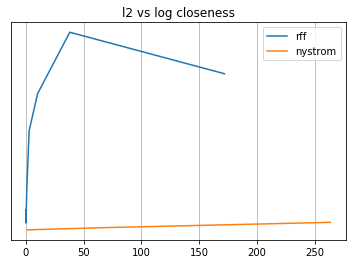

In [222]:
plot_l2_vs_measurement(lamb="0.01")

### play ground investigation

In [ ]:
def get_closeness(spectrum, spectrum_baseline, lamb):
    return np.linalg.norm(spectrum / (spectrum + lamb) - spectrum_baseline / (spectrum_baseline + lamb) )**2 

def get_log_closeness(spectrum, spectrum_baseline, lamb):
    return np.linalg.norm(np.log(spectrum + lamb) - np.log(spectrum_baseline + lamb) )**2

In [213]:
lamb = "0.01"
n_rff_feat = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000, 800000, 1600000]
general_folder_measurement = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff"
general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/from_star_cluster/nystrom_vs_rff"
# plt.figure()
f_norm_list = []
spectral_norm_list = []
closeness_list = []
log_closeness_list = []
test_loss_list = []
l2_loss_list = []
for n_feat in n_rff_feat:
    folder_name = general_folder_measurement + "/census_type_rff_l2_reg_0.0_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_0.5_seed_1"
    file_name = "spectrum_train.npy"
    spectrum = get_spectrum(folder_name, file_name)

    file_name = "metric_sample_train.txt"
    metric_name = "F_norm_error"
    f_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
    f_norm_list.append(f_norm_error)

    metric_name = "spectral_norm_error"
    spectral_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
    spectral_norm_list.append(spectral_norm_error)

    closeness = get_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
    closeness_list.append(closeness)

    log_closeness = get_log_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
    log_closeness_list.append(log_closeness)    

    folder_name = general_folder_performance + "/census_type_rff_l2_reg_" + lamb + "_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_0.5_seed_1"
    file_name = "eval_metric.txt"
    l2_loss = get_performance_metric(folder_name, file_name, min_best=True)
    l2_loss_list.append(l2_loss)

f_norm_list_rff = deepcopy(f_norm_list)
spectral_norm_list_rff = deepcopy(spectral_norm_list)
closeness_list_rff = deepcopy(closeness_list)
log_closeness_list_rff = deepcopy(log_closeness_list)
test_loss_list_rff = deepcopy(test_loss_list)
l2_loss_list_rff = deepcopy(l2_loss_list)

# get info for nystrom method
n_nystrom_feat = [1250, 2500, 5000, 10000, 20000]
general_folder_measurement = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff"
general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/from_star_cluster/nystrom_vs_rff"
# plt.figure()
f_norm_list = []
spectral_norm_list = []
closeness_list = []
log_closeness_list = []
test_loss_list = []
l2_loss_list = []
for n_feat in n_nystrom_feat:
    folder_name = general_folder_measurement + "/census_type_nystrom_l2_reg_0.0_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_0.5_seed_1"
    file_name = "spectrum_train.npy"
    spectrum = get_spectrum(folder_name, file_name)

    file_name = "metric_sample_train.txt"
    metric_name = "F_norm_error"
    f_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
    f_norm_list.append(f_norm_error)

    metric_name = "spectral_norm_error"
    spectral_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
    spectral_norm_list.append(spectral_norm_error)

    closeness = get_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
    closeness_list.append(closeness)

    log_closeness = get_log_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
    log_closeness_list.append(log_closeness)    

    folder_name = general_folder_performance + "/census_type_nystrom_l2_reg_" + lamb + "_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_0.5_seed_1"
    file_name = "eval_metric.txt"
    l2_loss = get_performance_metric(folder_name, file_name, min_best=True)
    l2_loss_list.append(l2_loss)

f_norm_list_nystrom = deepcopy(f_norm_list)
spectral_norm_list_nystrom = deepcopy(spectral_norm_list)
closeness_list_nystrom = deepcopy(closeness_list)
log_closeness_list_nystrom = deepcopy(log_closeness_list)
test_loss_list_nystrom = deepcopy(test_loss_list)
l2_loss_list_nystrom = deepcopy(l2_loss_list)

plt.figure()
plt.plot(f_norm_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), label="rff")
plt.plot(f_norm_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), label="nystrom")
plt.title("l2 vs f norm")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

plt.figure()
plt.plot(spectral_norm_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), label="rff")
plt.plot(spectral_norm_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), label="nystrom")
plt.title("l2 vs spectral norm")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

plt.figure()
plt.plot(closeness_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), label="rff")
plt.plot(closeness_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), label="nystrom")
plt.title("l2 vs closeness")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

plt.figure()
plt.plot(log_closeness_list_rff, np.sqrt(np.array(l2_loss_list_rff).astype(np.float64) ), label="rff")
plt.plot(log_closeness_list_nystrom, np.sqrt(np.array(l2_loss_list_nystrom).astype(np.float64) ), label="nystrom")
plt.title("l2 vs log closeness")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

### cut off

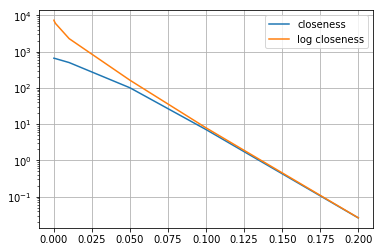

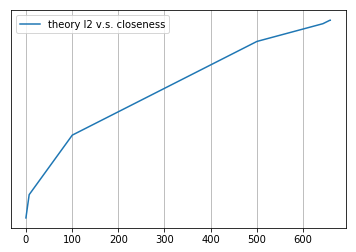

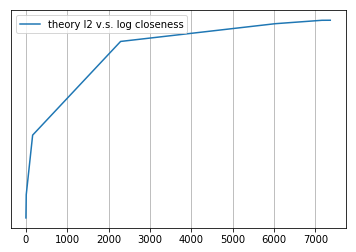

In [50]:
keep_perc_list = [0.0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
closeness_list = []
log_closeness_list = []
theory_l2_list = []
lamb = 1e-2
noise = 1e0
for keep_perc in keep_perc_list:
    S_cut = S_baseline.copy()
    S_cut[int(keep_perc * dim):] = 0.0
#     print int(keep_perc * dim)
    closeness_list.append(get_closeness(S_cut, S_baseline, lamb) )
    log_closeness_list.append(get_log_closeness(S_cut, S_baseline, lamb) )
    theory_l2_list.append(expected_loss(lamb, U, S_cut, Y, noise) )
plt.figure()
plt.semilogy(keep_perc_list, closeness_list, label="closeness")
plt.semilogy(keep_perc_list, log_closeness_list, label="log closeness")
# plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
# plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
# plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
plt.grid()
plt.legend()
plt.show()

plt.figure()
# plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
# plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
plt.grid()
plt.legend()
plt.show()
# print closeness_list
# print log_closeness_list
# print theory_l2_list
# print len(closeness_list)
# print len(log_closeness_list)
# print len(theory_l2_list)

noise  0.1 lamb  1e-06


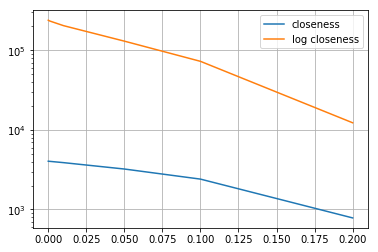

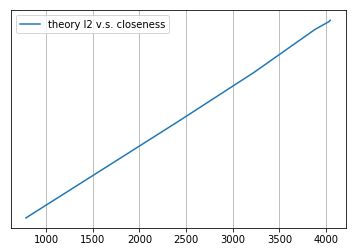

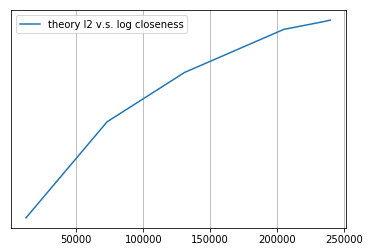

noise  0.1 lamb  1e-05


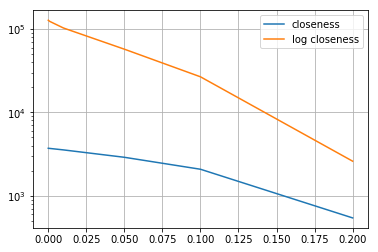

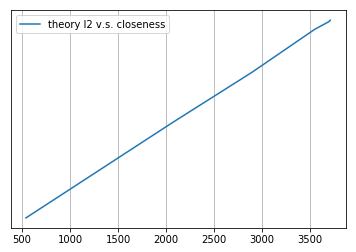

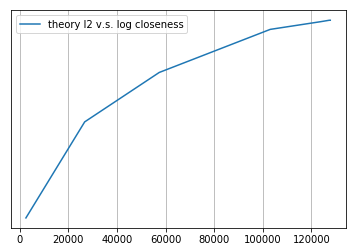

noise  0.1 lamb  0.001


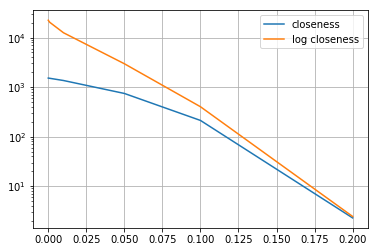

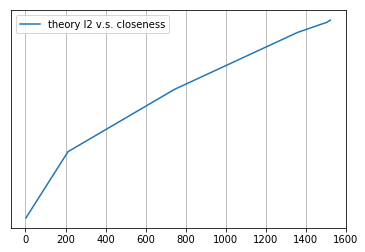

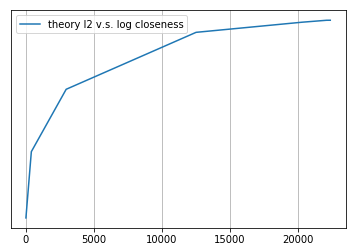

noise  0.1 lamb  0.01


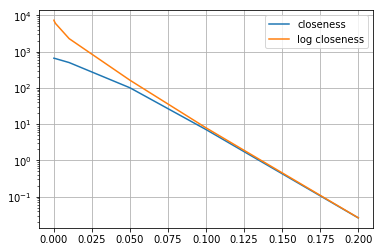

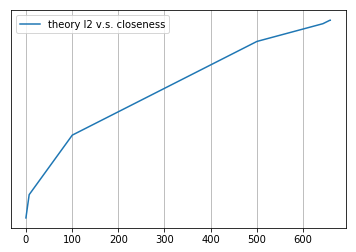

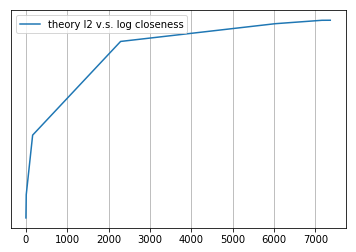

noise  0.1 lamb  0.1


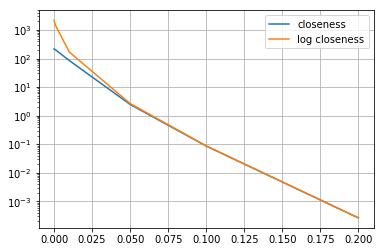

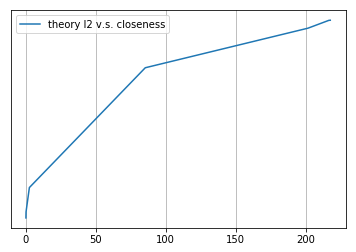

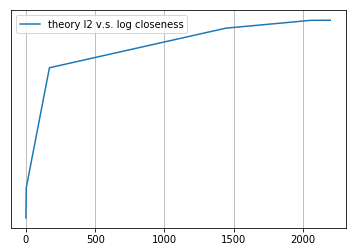

noise  0.1 lamb  1.0


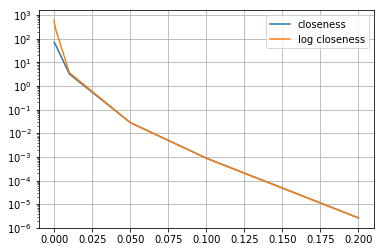

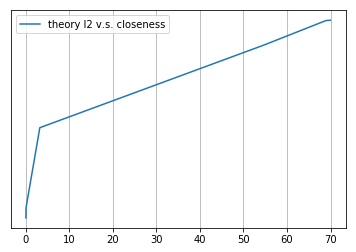

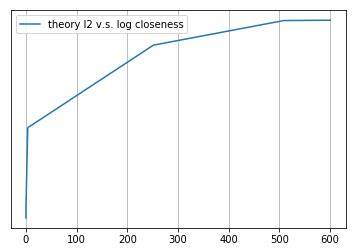

noise  0.1 lamb  10.0


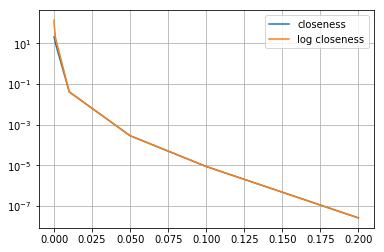

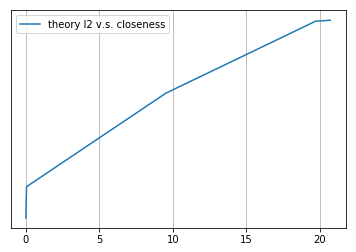

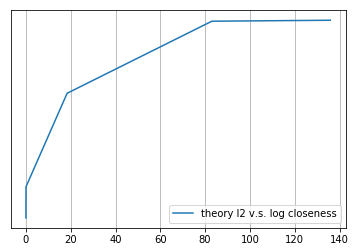

noise  1.0 lamb  1e-06


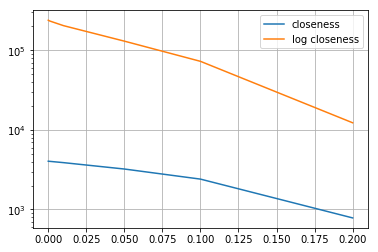

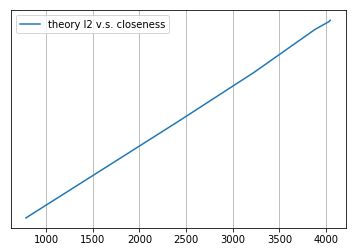

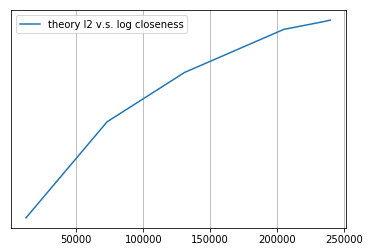

noise  1.0 lamb  1e-05


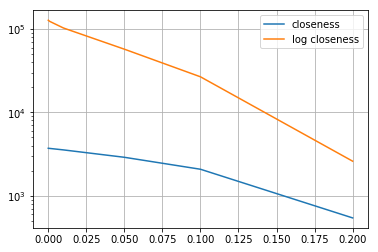

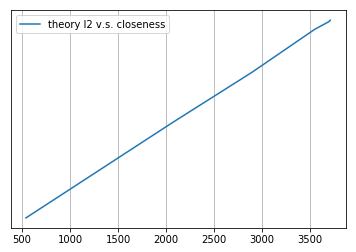

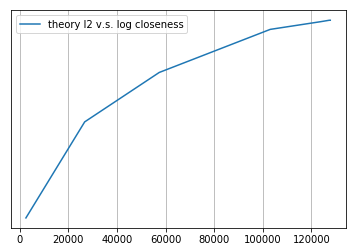

noise  1.0 lamb  0.001


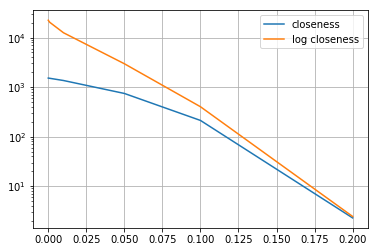

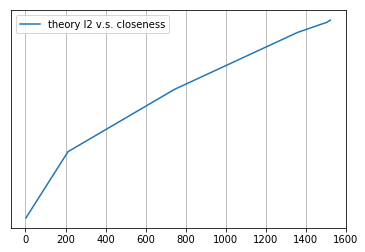

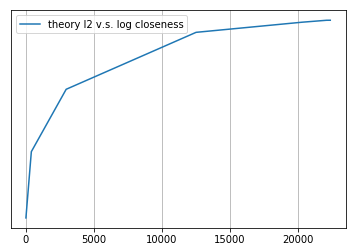

noise  1.0 lamb  0.01


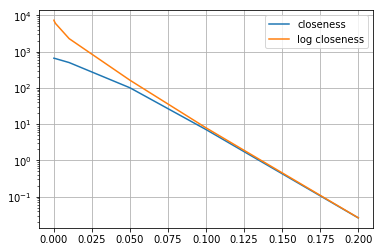

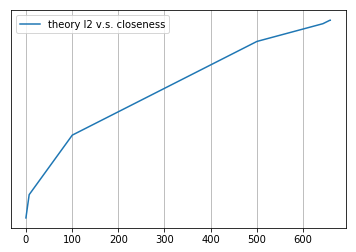

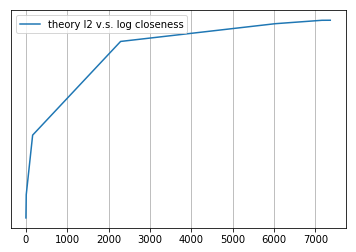

noise  1.0 lamb  0.1


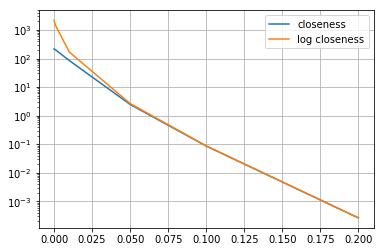

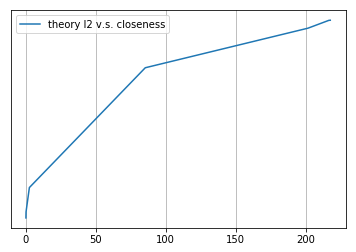

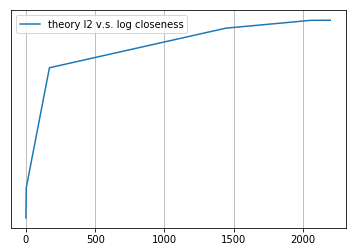

noise  1.0 lamb  1.0


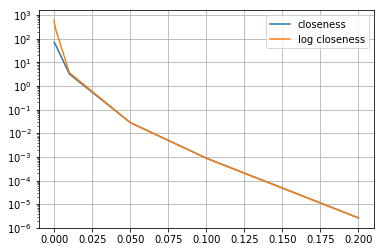

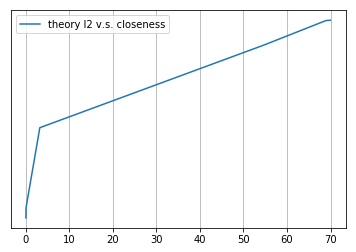

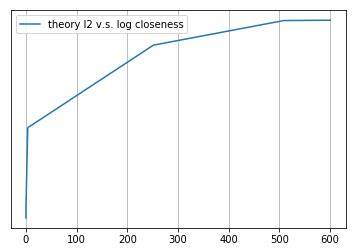

noise  1.0 lamb  10.0


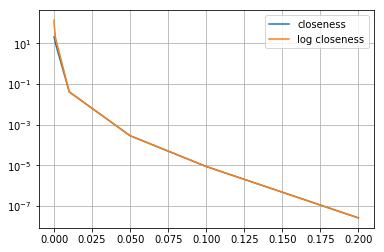

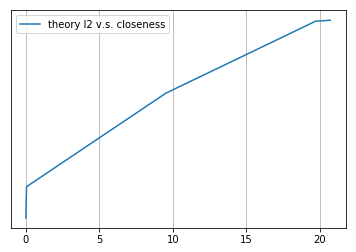

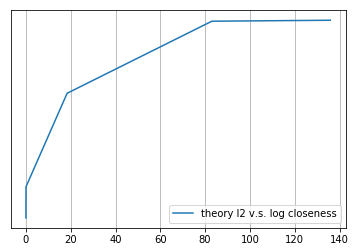

noise  10.0 lamb  1e-06


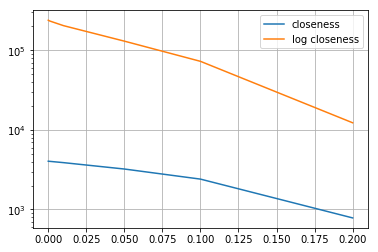

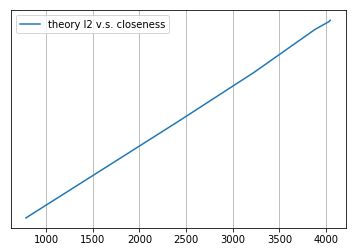

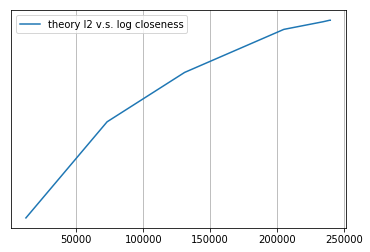

noise  10.0 lamb  1e-05


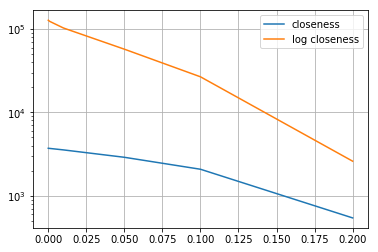

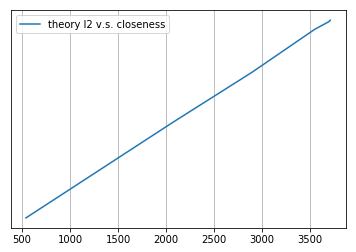

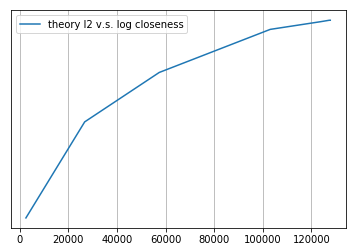

noise  10.0 lamb  0.001


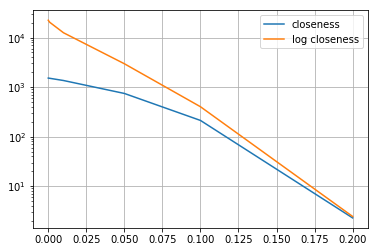

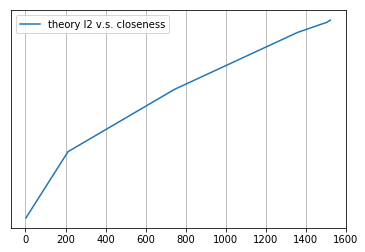

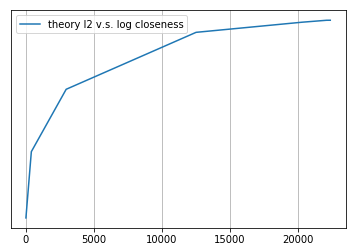

noise  10.0 lamb  0.01


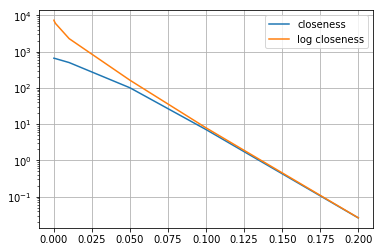

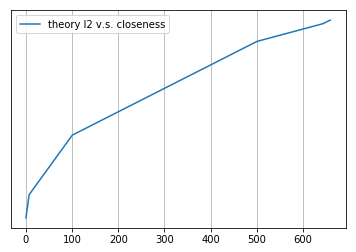

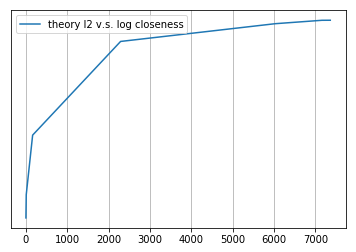

noise  10.0 lamb  0.1


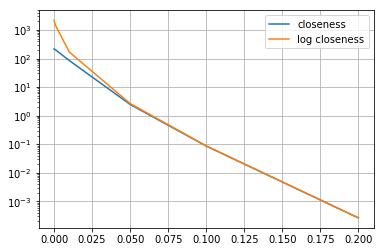

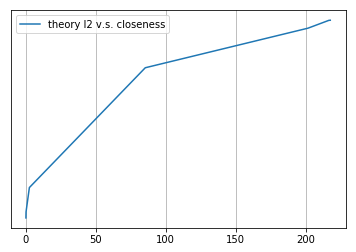

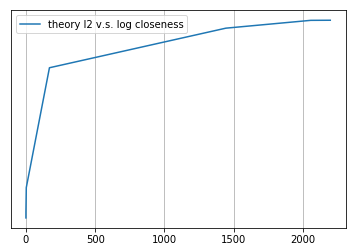

noise  10.0 lamb  1.0


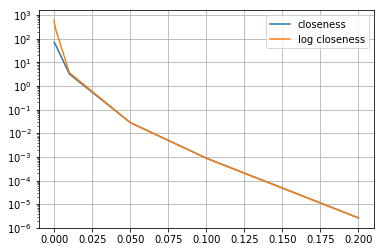

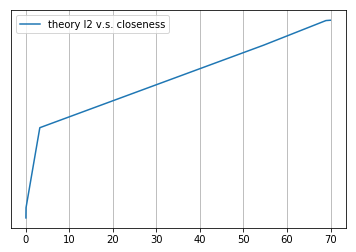

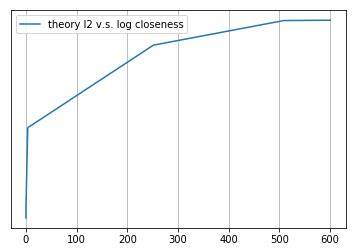

noise  10.0 lamb  10.0


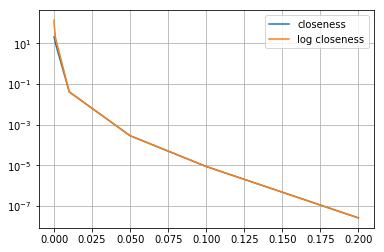

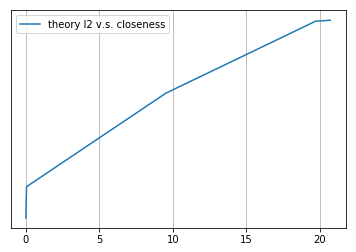

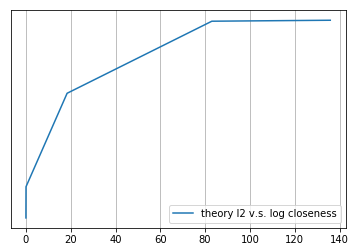

noise  100.0 lamb  1e-06


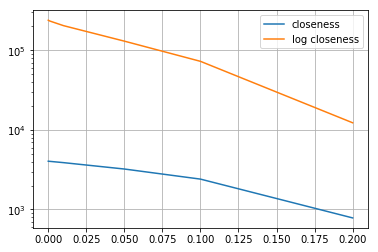

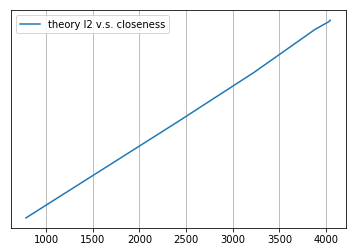

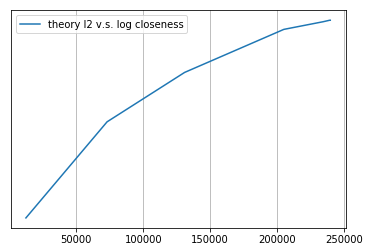

noise  100.0 lamb  1e-05


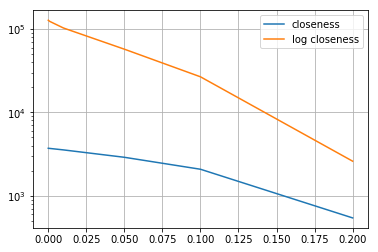

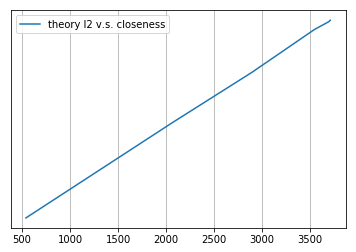

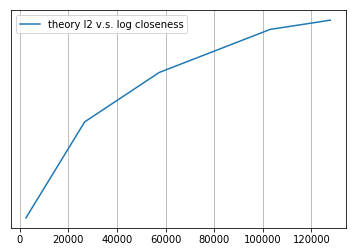

noise  100.0 lamb  0.001


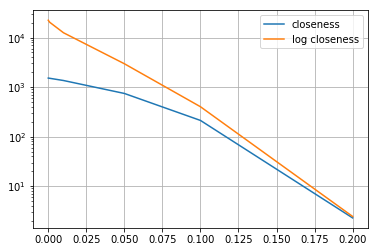

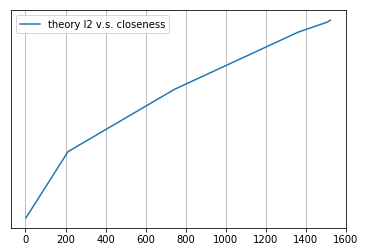

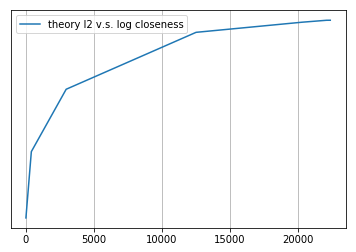

noise  100.0 lamb  0.01


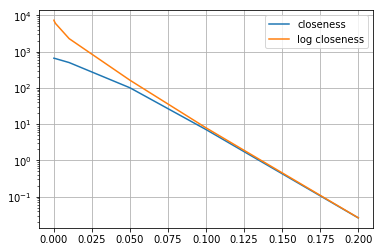

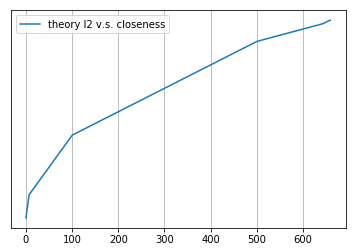

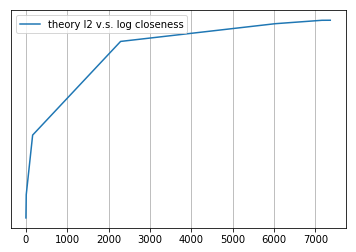

noise  100.0 lamb  0.1


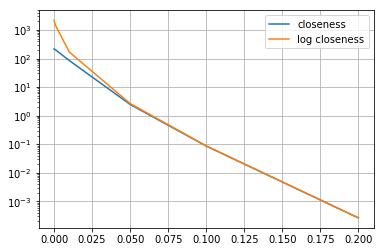

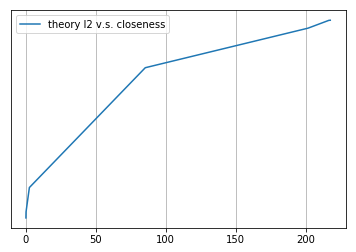

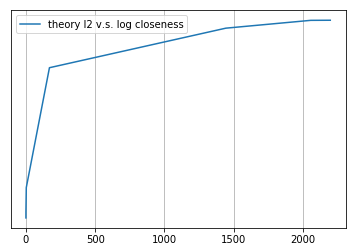

noise  100.0 lamb  1.0


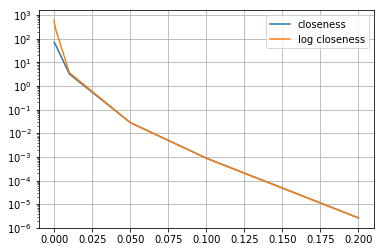

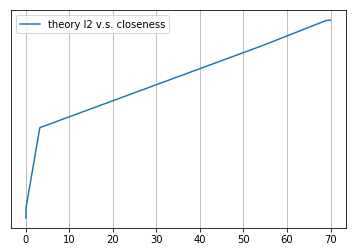

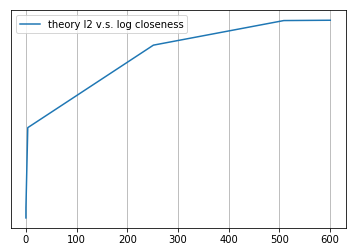

noise  100.0 lamb  10.0


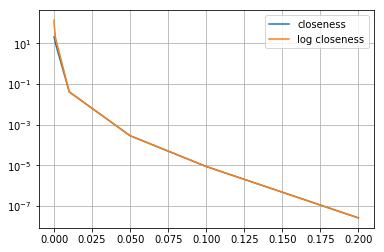

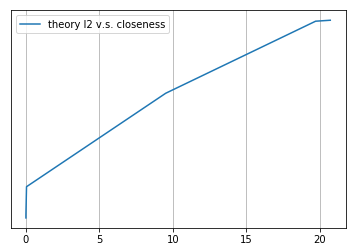

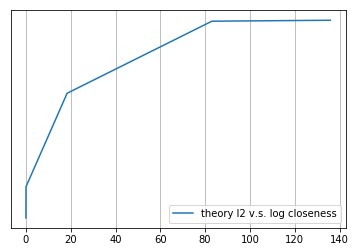

noise  1000.0 lamb  1e-06


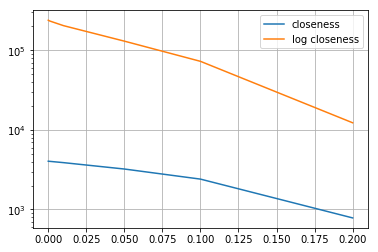

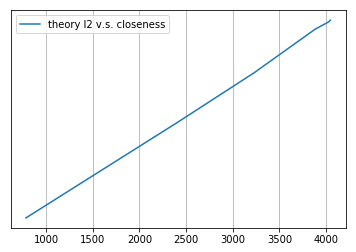

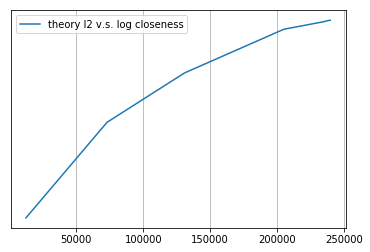

noise  1000.0 lamb  1e-05


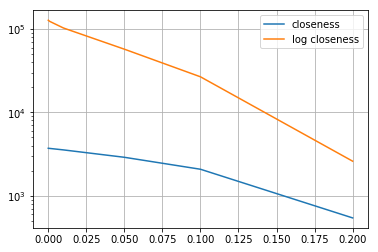

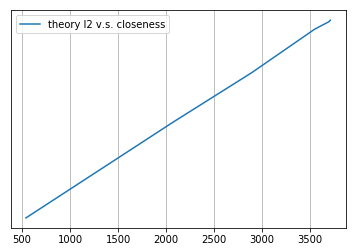

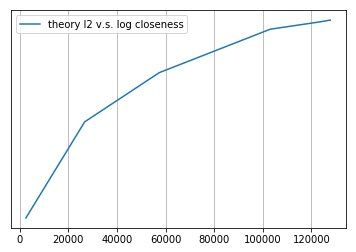

noise  1000.0 lamb  0.001


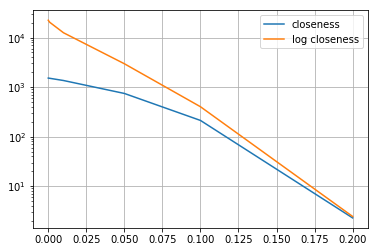

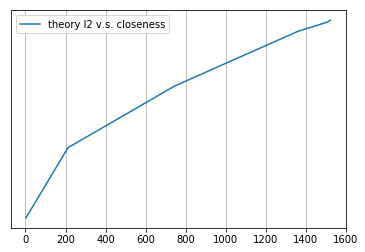

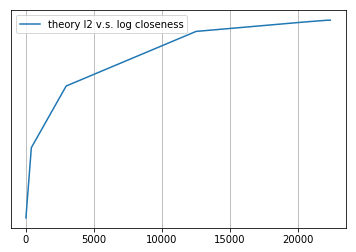

noise  1000.0 lamb  0.01


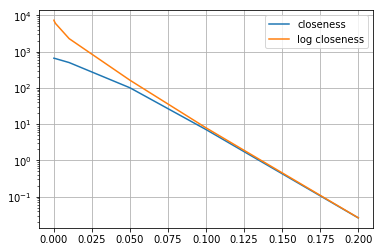

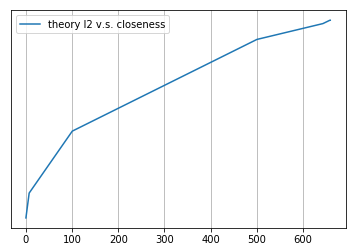

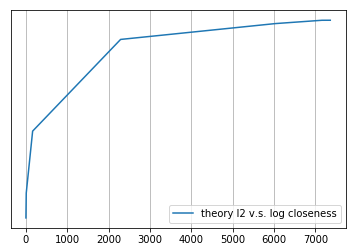

noise  1000.0 lamb  0.1


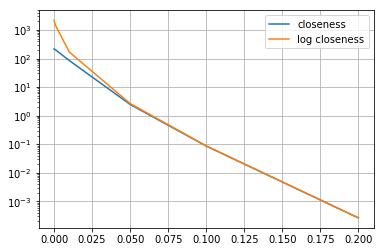

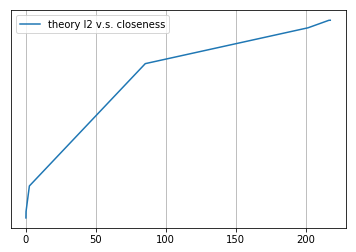

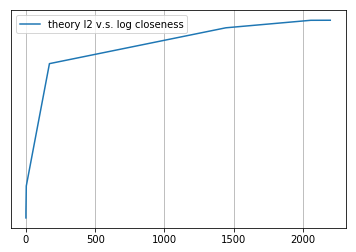

noise  1000.0 lamb  1.0


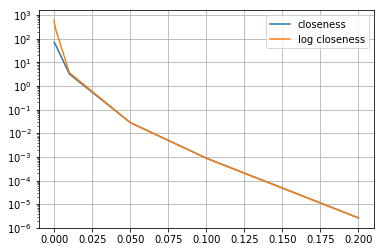

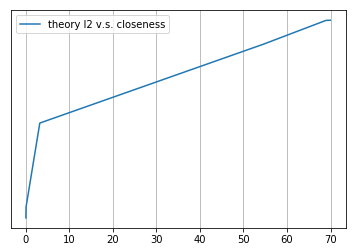

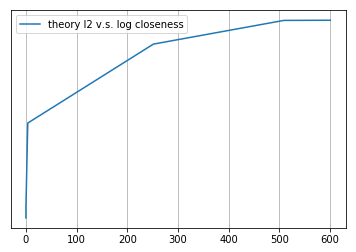

noise  1000.0 lamb  10.0


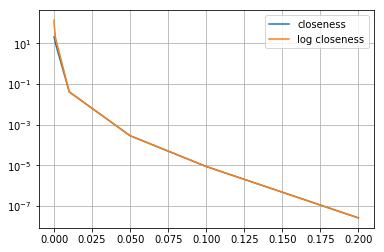

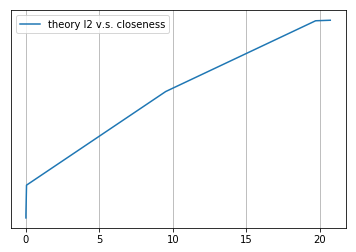

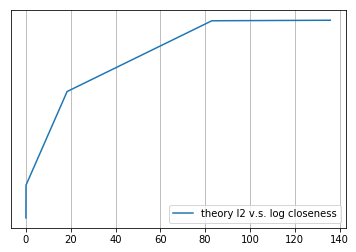

noise  10000.0 lamb  1e-06


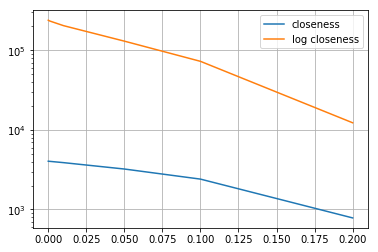

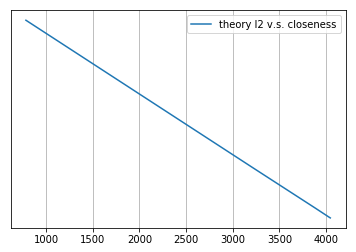

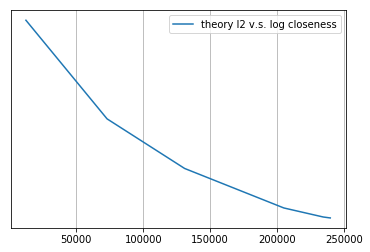

noise  10000.0 lamb  1e-05


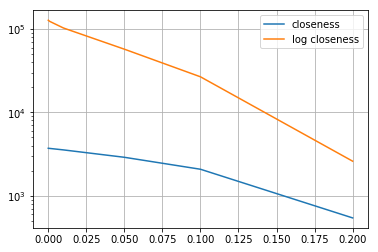

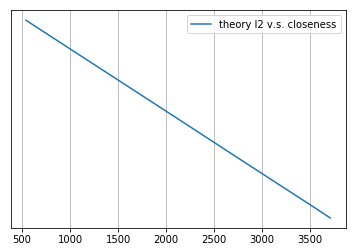

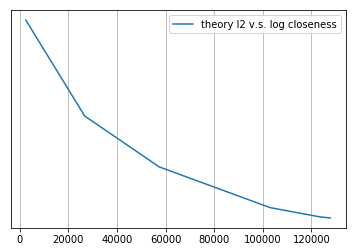

noise  10000.0 lamb  0.001


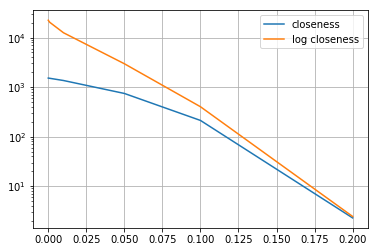

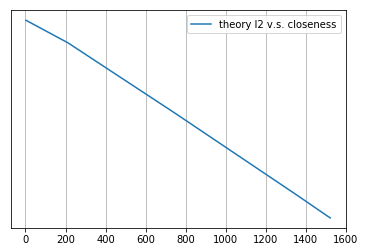

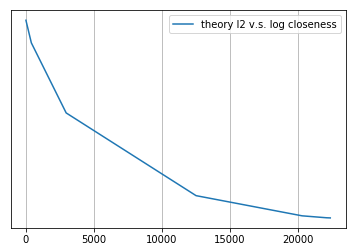

noise  10000.0 lamb  0.01


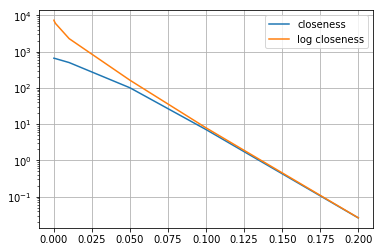

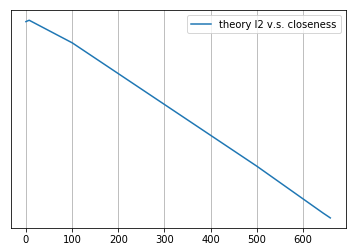

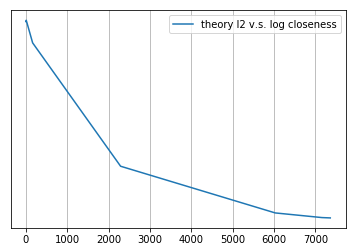

noise  10000.0 lamb  0.1


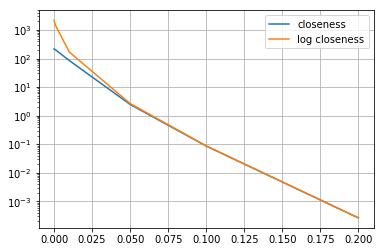

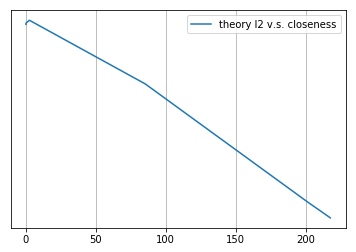

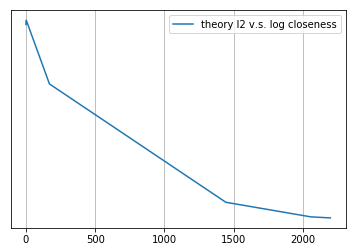

noise  10000.0 lamb  1.0


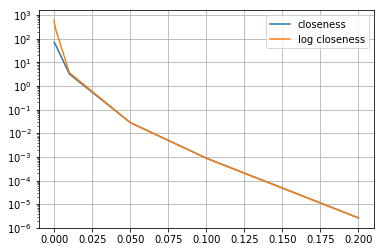

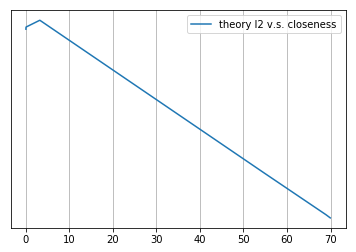

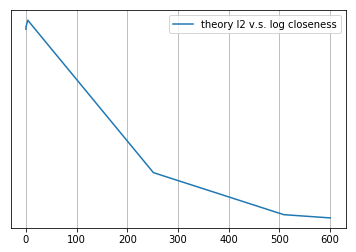

noise  10000.0 lamb  10.0


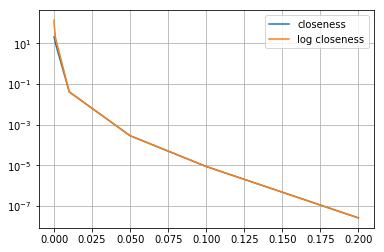

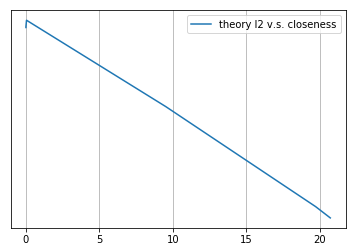

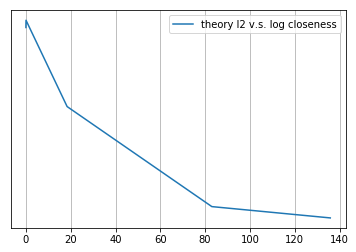

noise  100000.0 lamb  1e-06


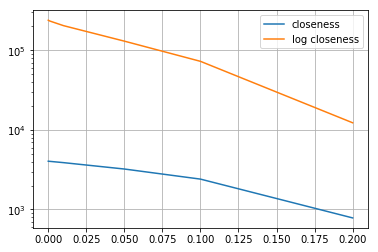

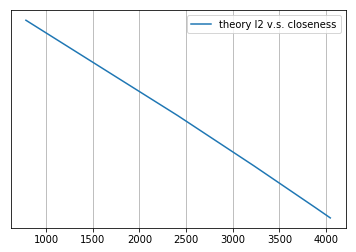

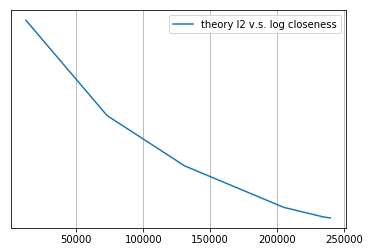

noise  100000.0 lamb  1e-05


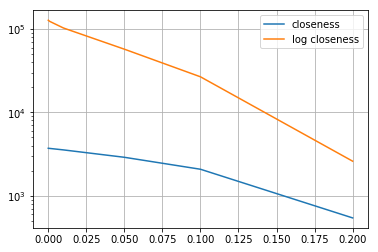

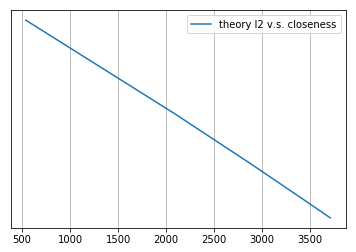

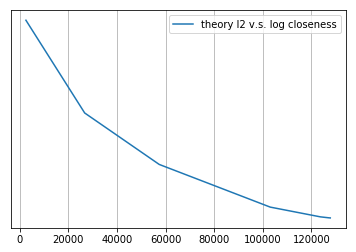

noise  100000.0 lamb  0.001


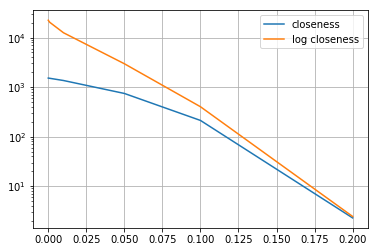

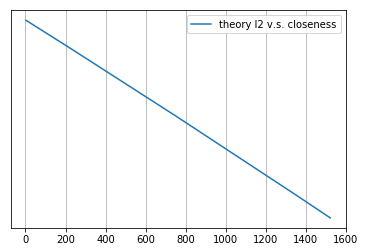

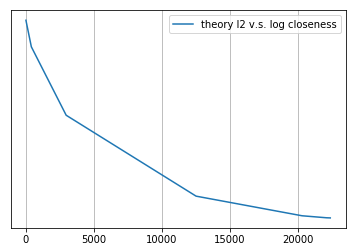

noise  100000.0 lamb  0.01


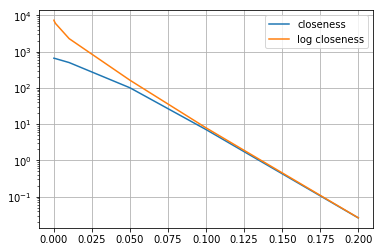

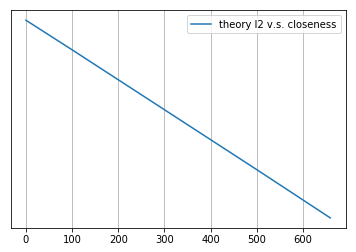

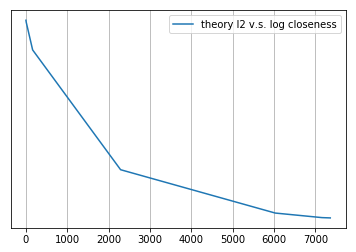

noise  100000.0 lamb  0.1


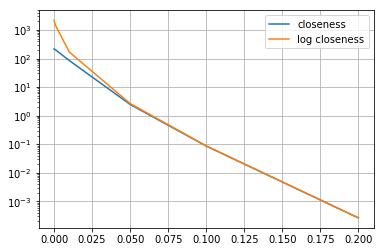

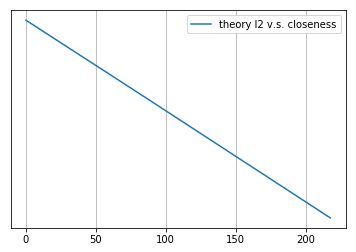

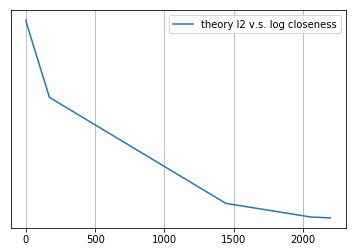

noise  100000.0 lamb  1.0


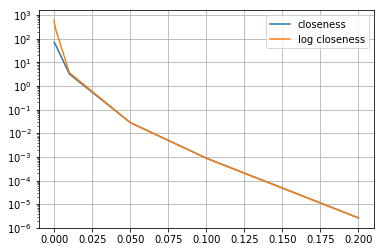

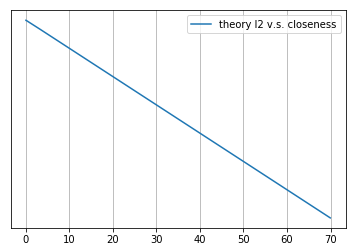

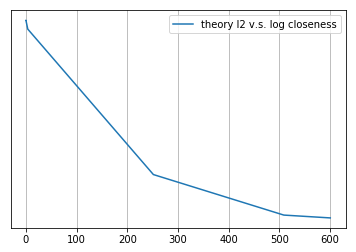

noise  100000.0 lamb  10.0


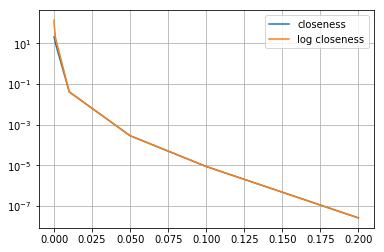

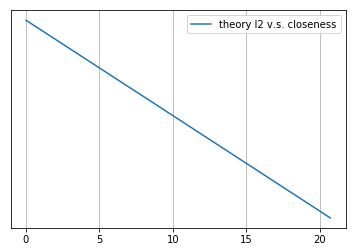

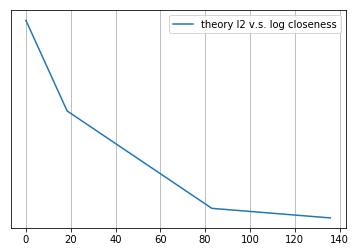

In [8]:
keep_perc_list = [0.0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
lamb_list = [1e-6, 1e-5, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
noise_list = [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
for noise in noise_list:
    for lamb in lamb_list:
        print "noise ", noise, "lamb ", lamb
        closeness_list = []
        log_closeness_list = []
        theory_l2_list = []
        for keep_perc in keep_perc_list:
            S_cut = S_baseline.copy()
            S_cut[int(keep_perc * dim):] = 0.0
        #     print int(keep_perc * dim)
            closeness_list.append(get_closeness(S_cut, S_baseline, lamb) )
            log_closeness_list.append(get_log_closeness(S_cut, S_baseline, lamb) )
            theory_l2_list.append(expected_loss(lamb, U, S_cut, Y, noise) )
        plt.figure()
        plt.semilogy(keep_perc_list, closeness_list, label="closeness")
        plt.semilogy(keep_perc_list, log_closeness_list, label="log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()

        plt.figure()
        plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
        # plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()

        plt.figure()
        # plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
        plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()
        # print closeness_list
        # print log_closeness_list
        # print theory_l2_list
        # print len(closeness_list)
        # print len(log_closeness_list)
        # print len(theory_l2_list)

### bump up

noise  0.1 lamb  1e-06


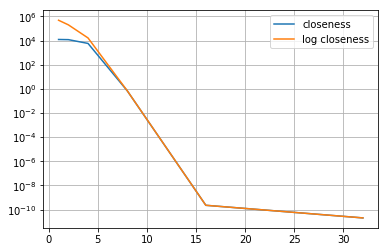

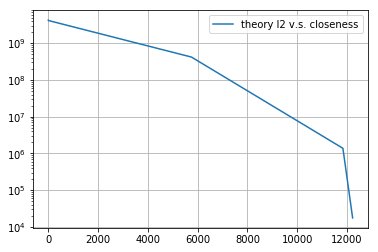

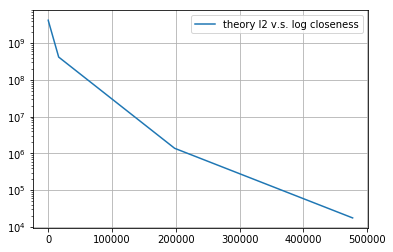

noise  0.1 lamb  1e-05


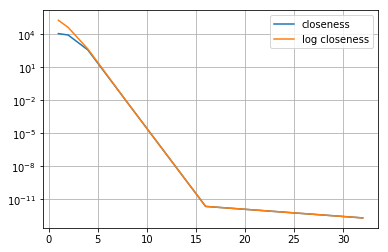

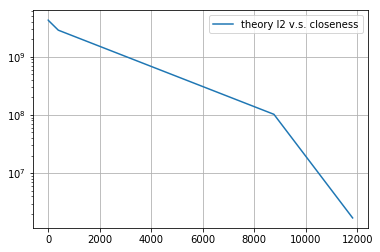

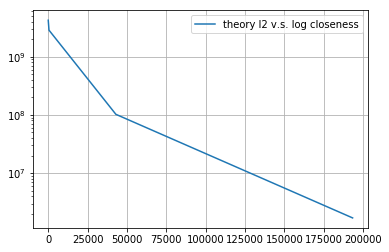

noise  0.1 lamb  0.001


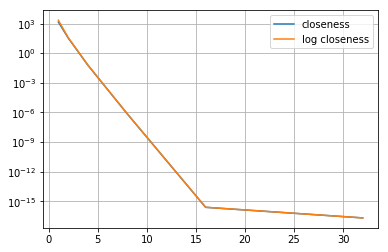

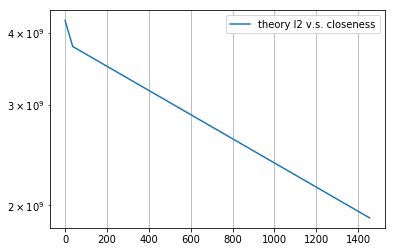

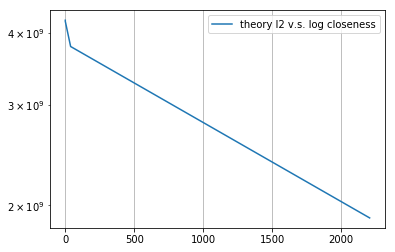

noise  0.1 lamb  0.01


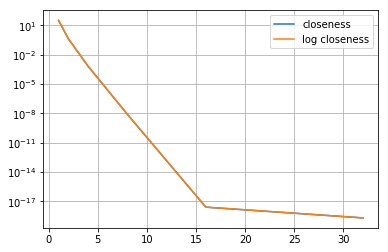

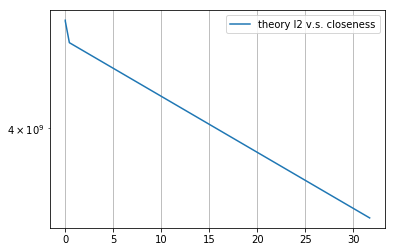

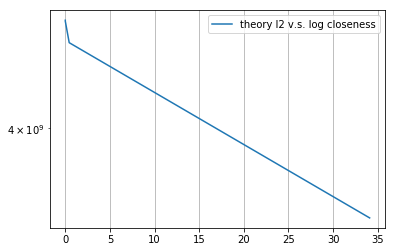

noise  0.1 lamb  0.1


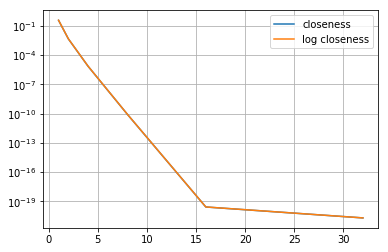

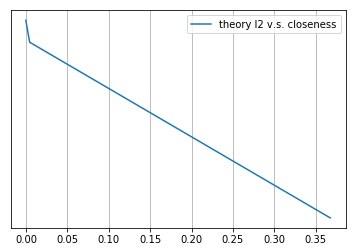

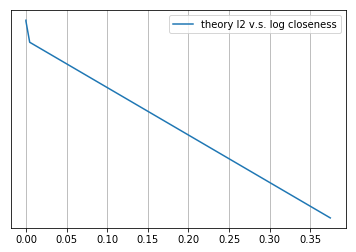

noise  0.1 lamb  1.0


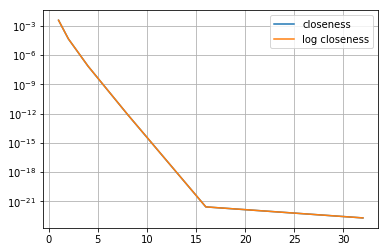

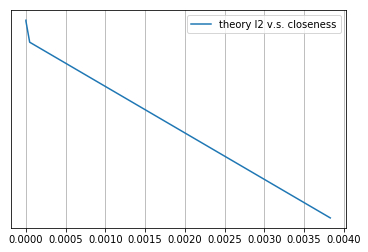

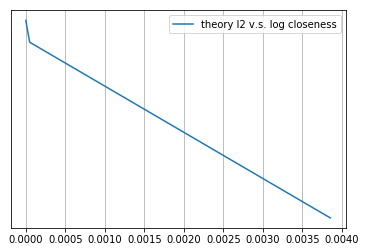

noise  0.1 lamb  10.0


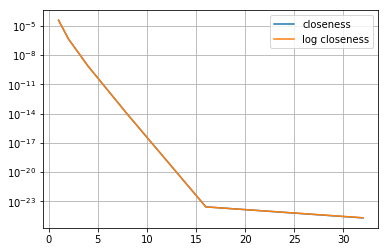

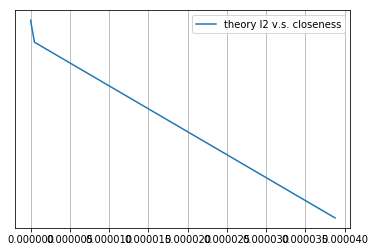

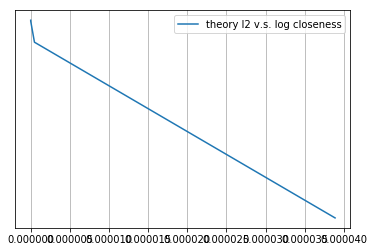

noise  1.0 lamb  1e-06


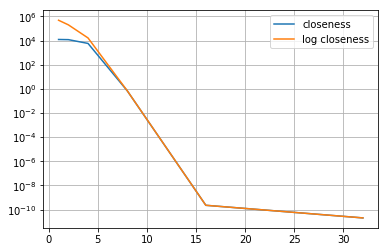

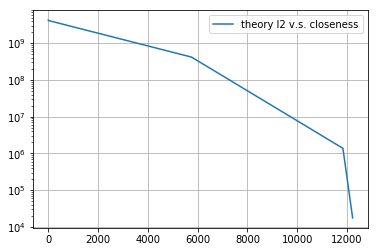

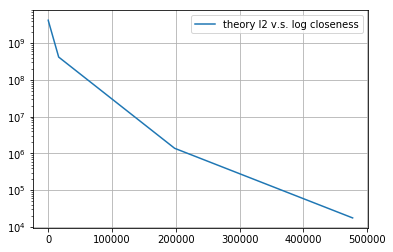

noise  1.0 lamb  1e-05


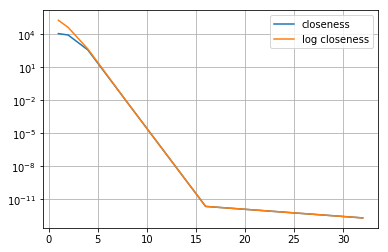

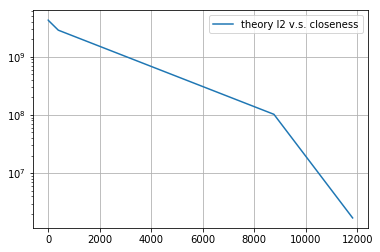

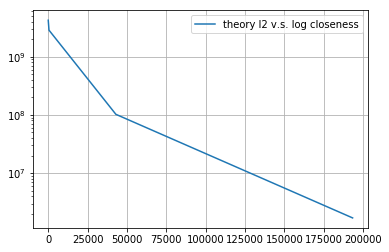

noise  1.0 lamb  0.001


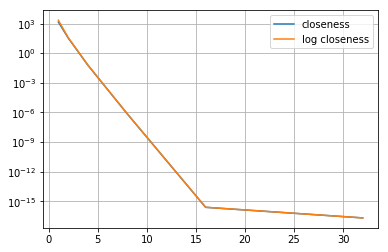

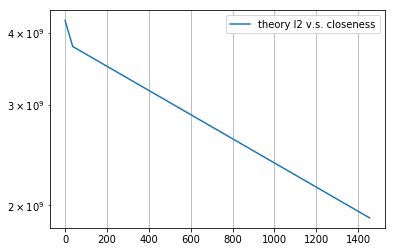

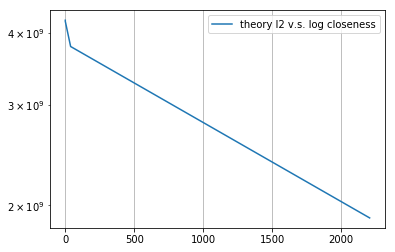

noise  1.0 lamb  0.01


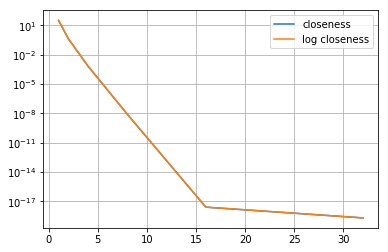

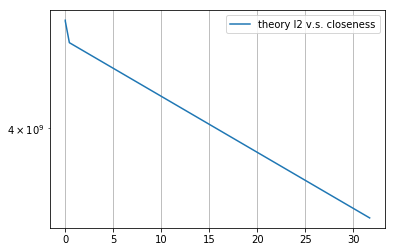

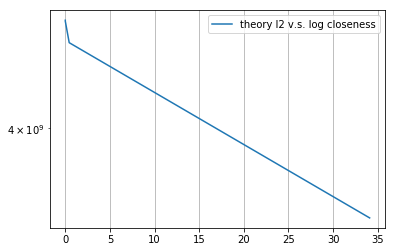

noise  1.0 lamb  0.1


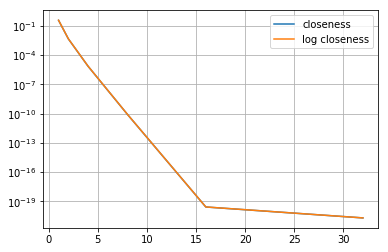

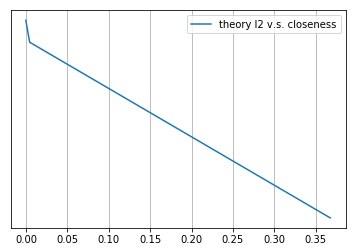

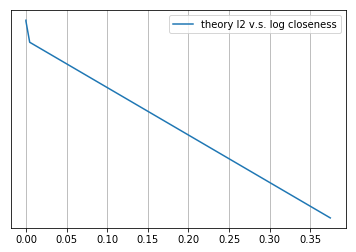

noise  1.0 lamb  1.0


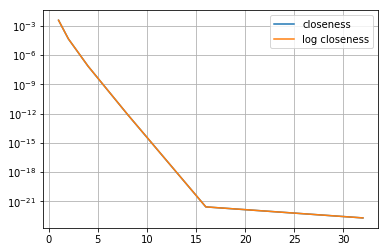

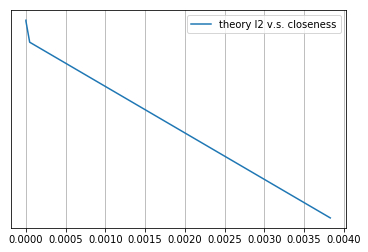

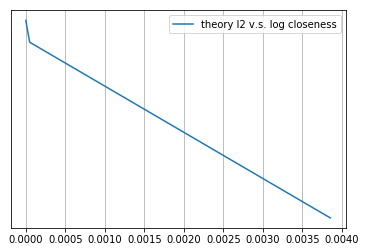

noise  1.0 lamb  10.0


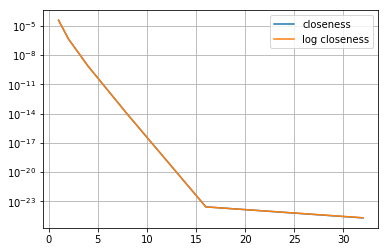

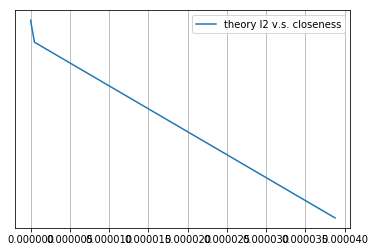

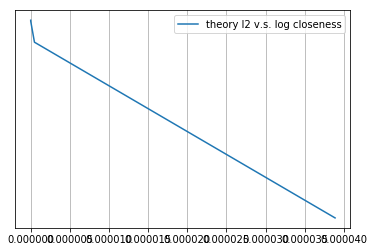

noise  10.0 lamb  1e-06


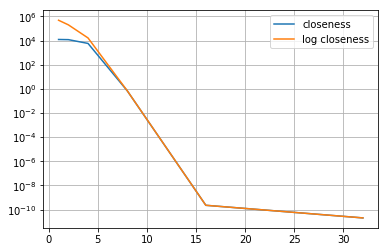

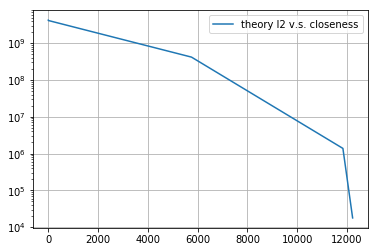

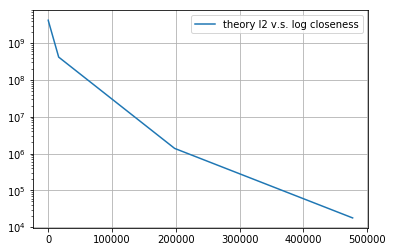

noise  10.0 lamb  1e-05


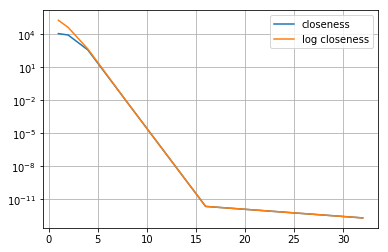

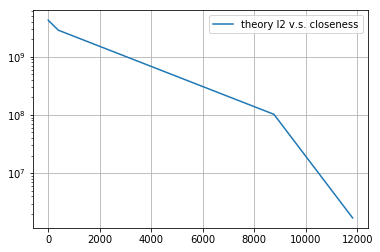

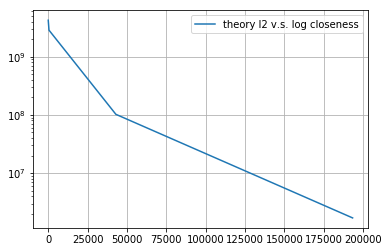

noise  10.0 lamb  0.001


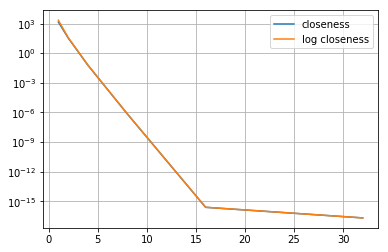

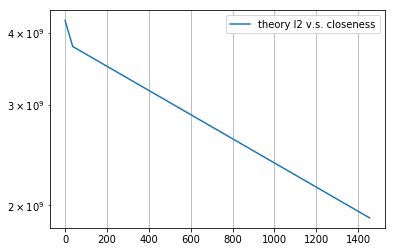

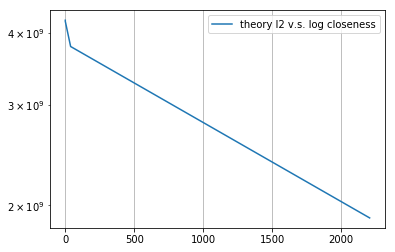

noise  10.0 lamb  0.01


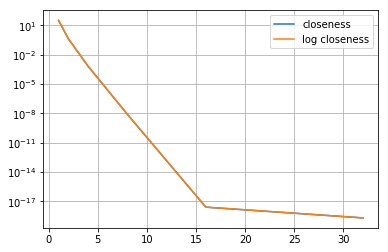

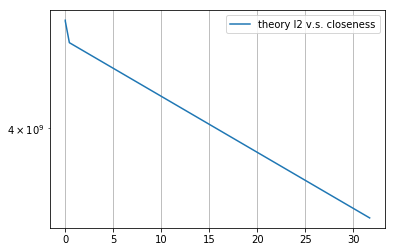

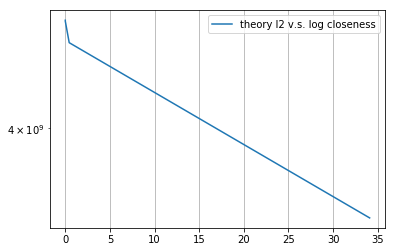

noise  10.0 lamb  0.1


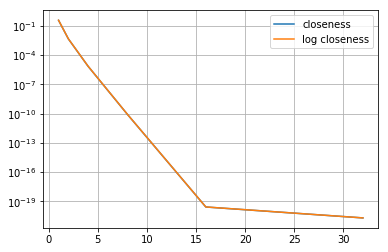

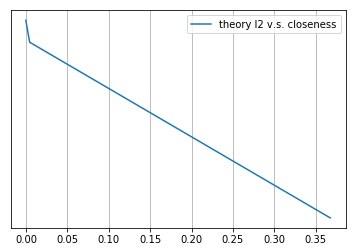

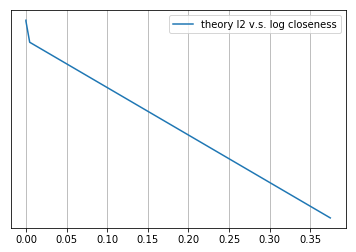

noise  10.0 lamb  1.0


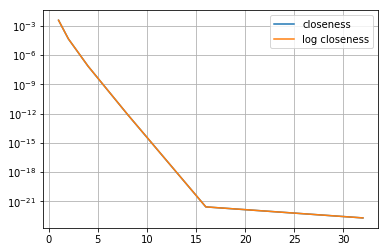

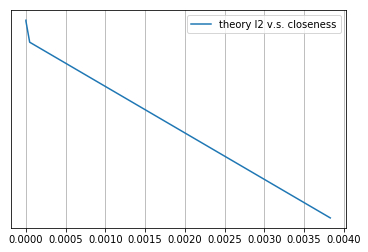

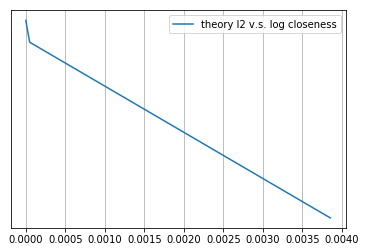

noise  10.0 lamb  10.0


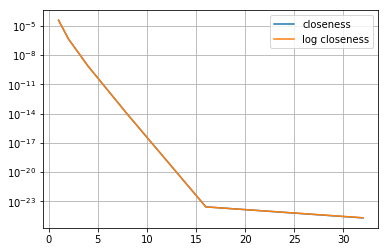

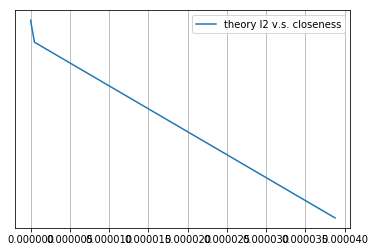

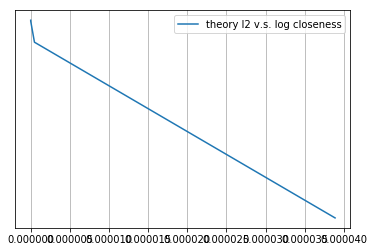

noise  100.0 lamb  1e-06


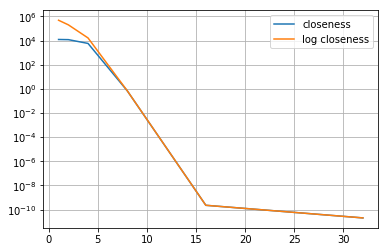

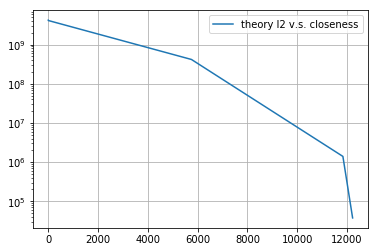

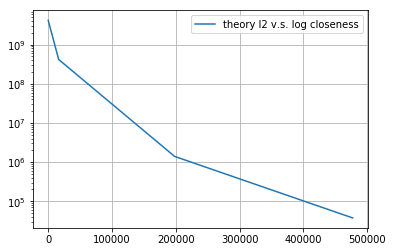

noise  100.0 lamb  1e-05


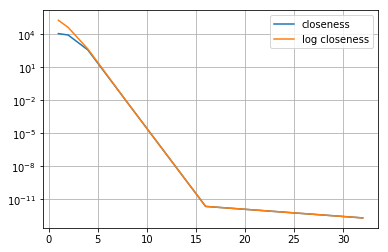

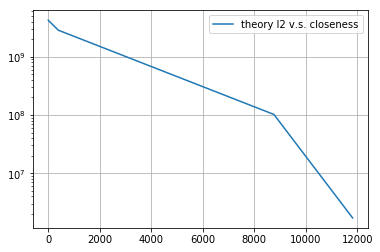

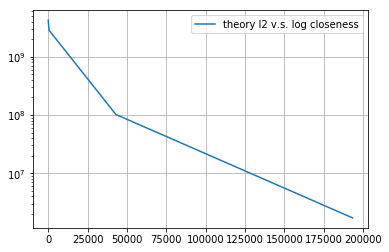

noise  100.0 lamb  0.001


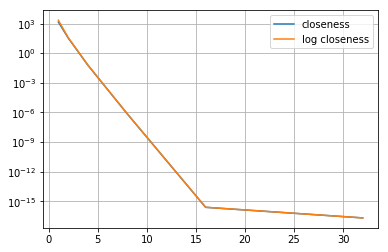

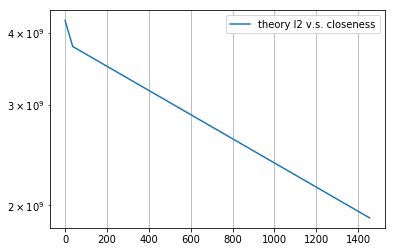

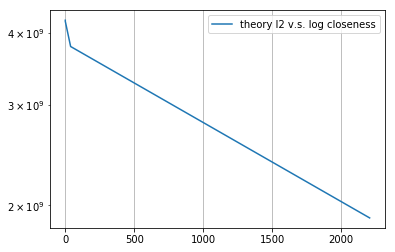

noise  100.0 lamb  0.01


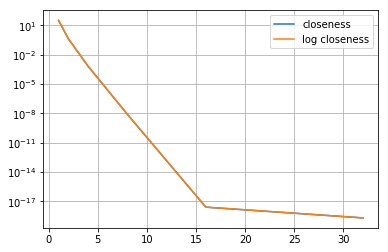

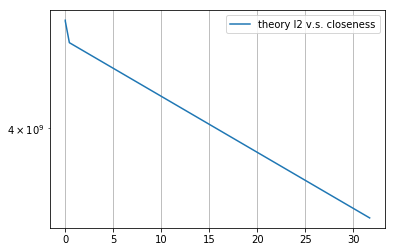

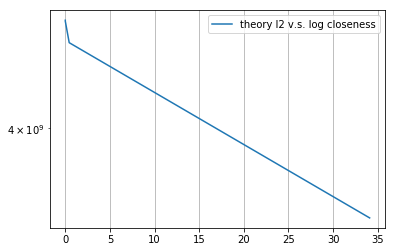

noise  100.0 lamb  0.1


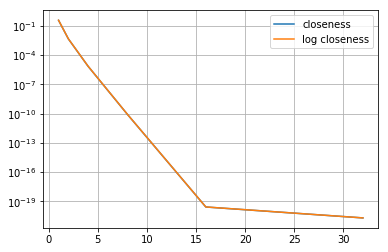

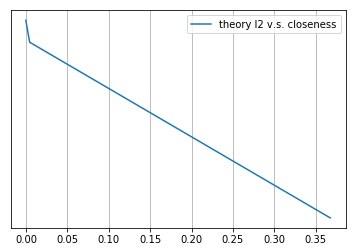

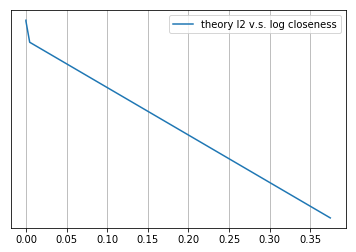

noise  100.0 lamb  1.0


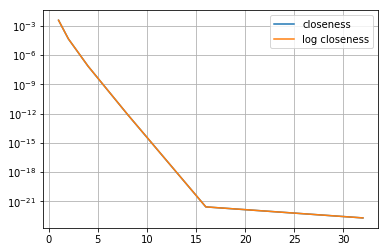

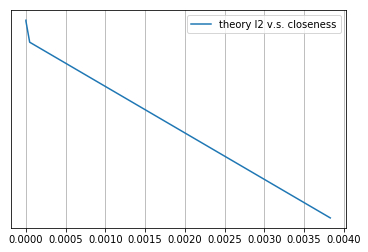

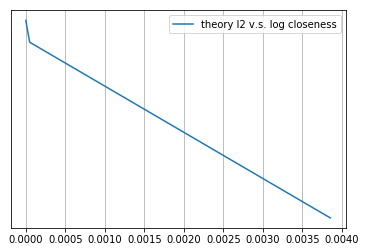

noise  100.0 lamb  10.0


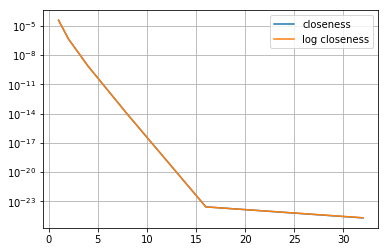

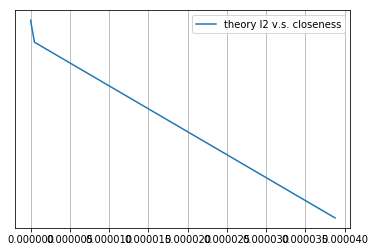

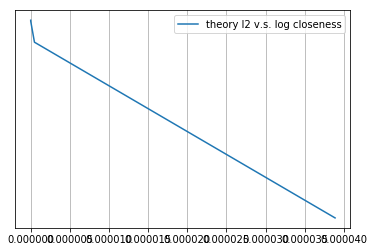

noise  1000.0 lamb  1e-06


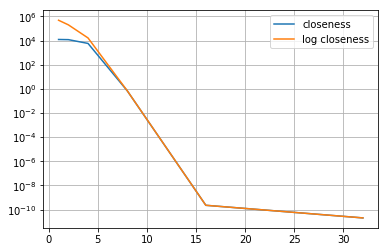

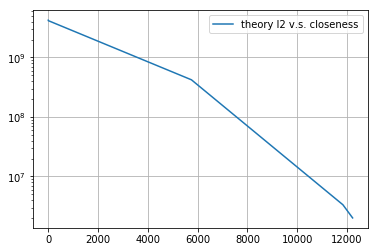

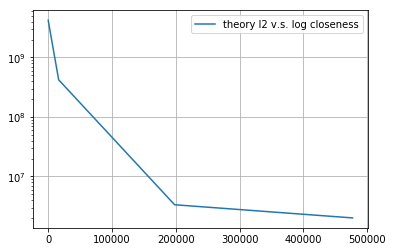

noise  1000.0 lamb  1e-05


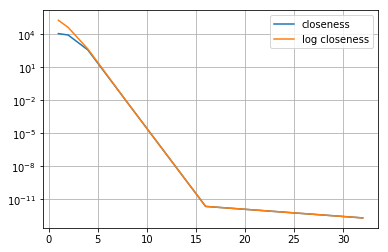

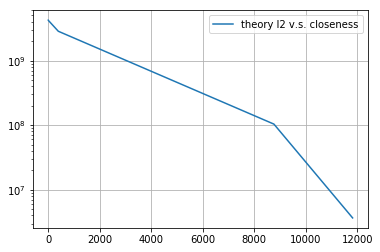

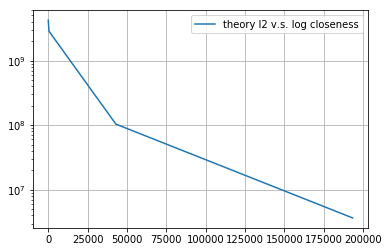

noise  1000.0 lamb  0.001


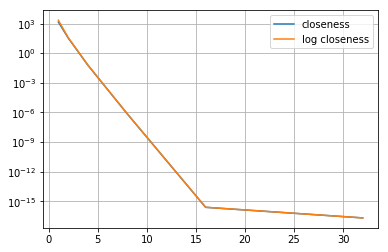

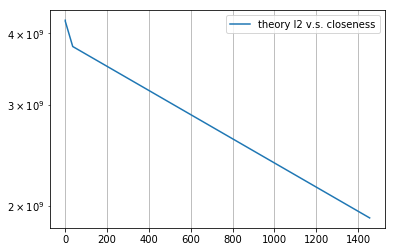

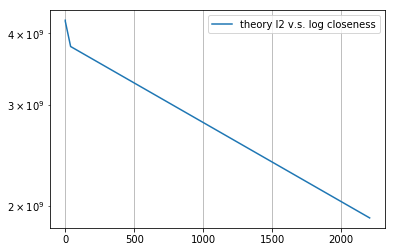

noise  1000.0 lamb  0.01


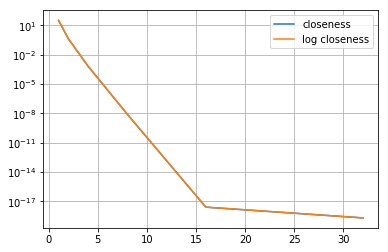

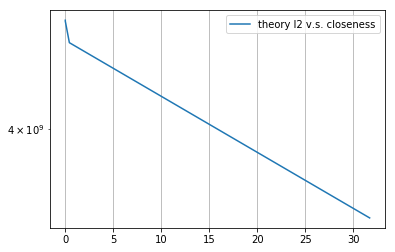

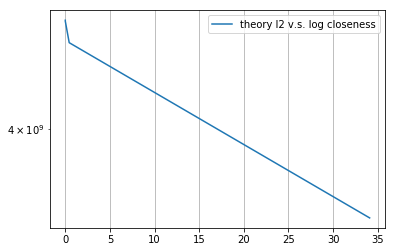

noise  1000.0 lamb  0.1


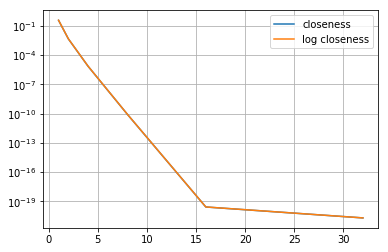

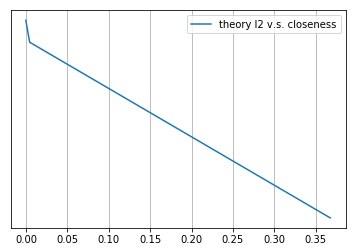

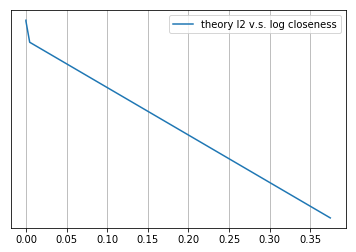

noise  1000.0 lamb  1.0


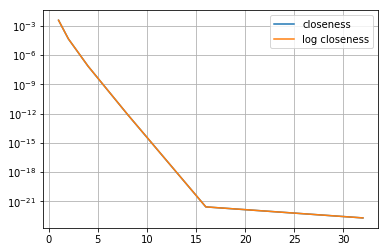

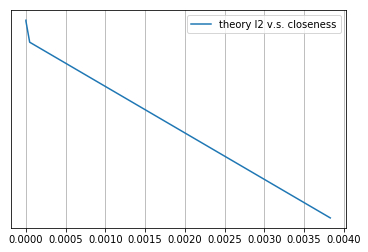

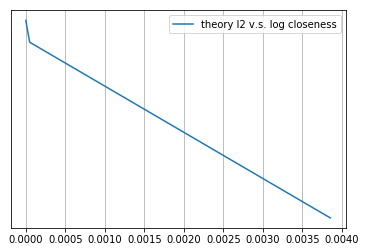

noise  1000.0 lamb  10.0


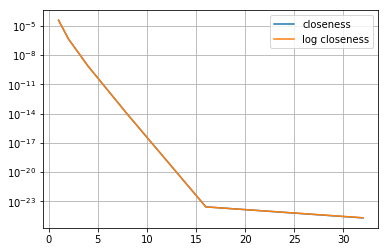

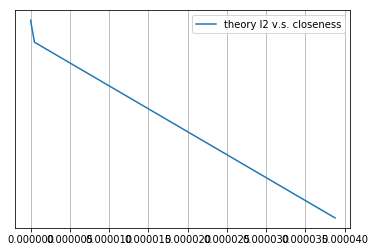

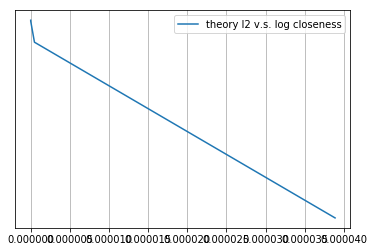

noise  10000.0 lamb  1e-06


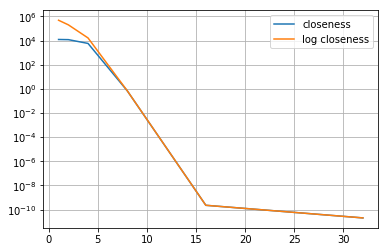

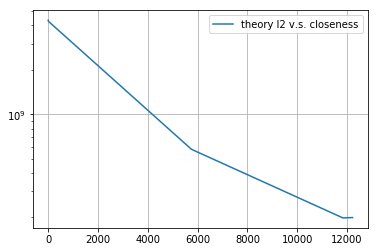

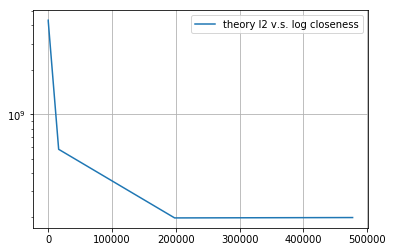

noise  10000.0 lamb  1e-05


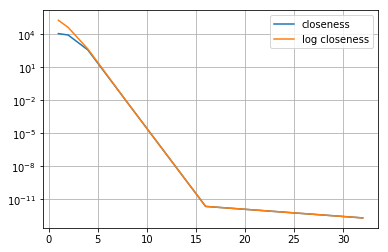

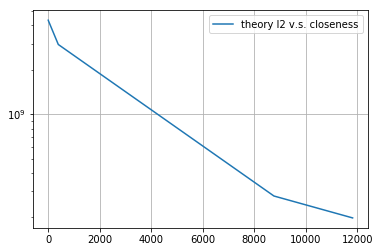

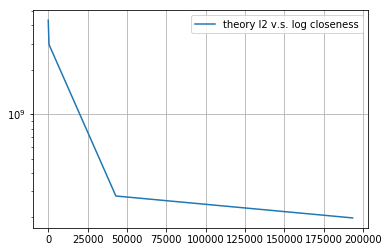

noise  10000.0 lamb  0.001


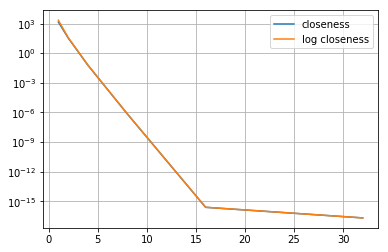

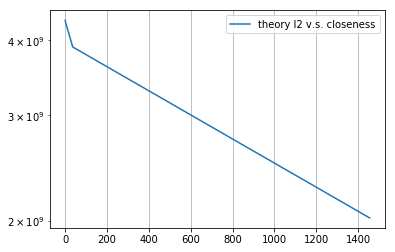

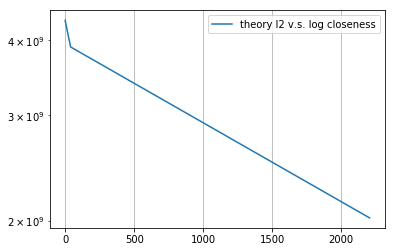

noise  10000.0 lamb  0.01


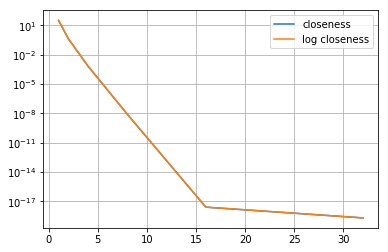

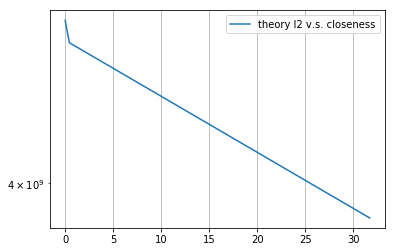

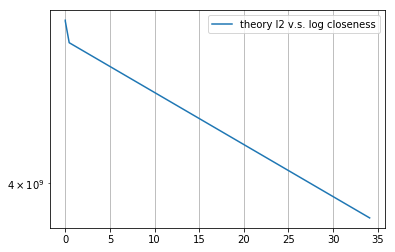

noise  10000.0 lamb  0.1


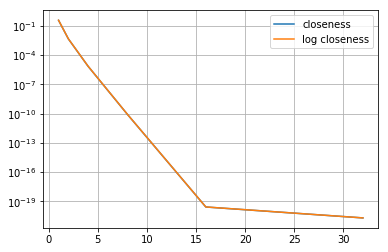

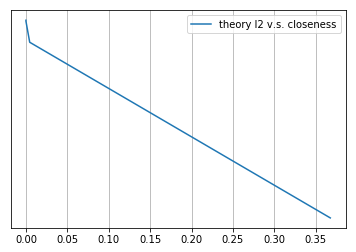

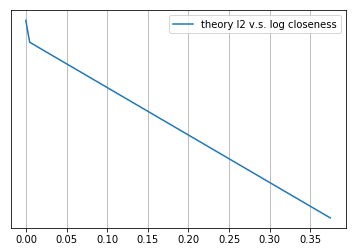

noise  10000.0 lamb  1.0


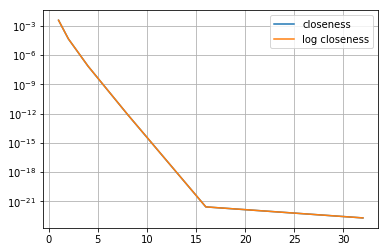

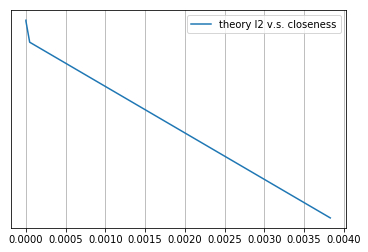

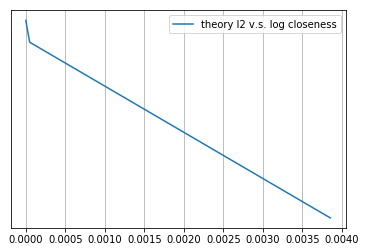

noise  10000.0 lamb  10.0


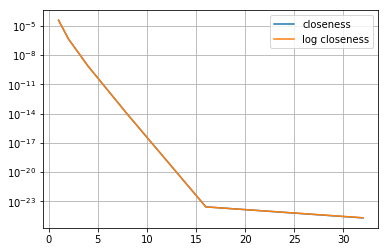

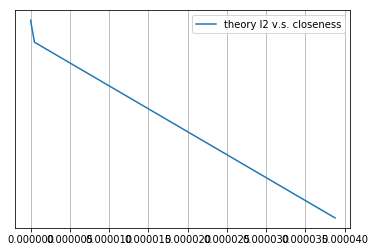

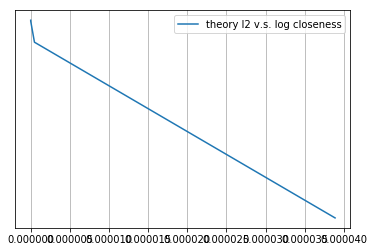

noise  100000.0 lamb  1e-06


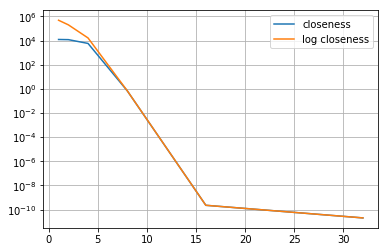

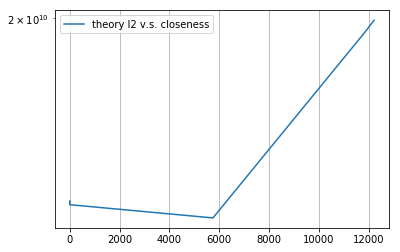

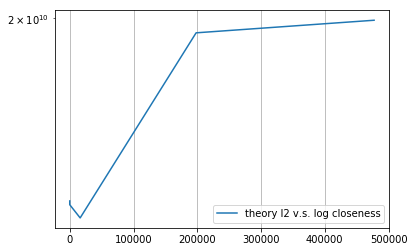

noise  100000.0 lamb  1e-05


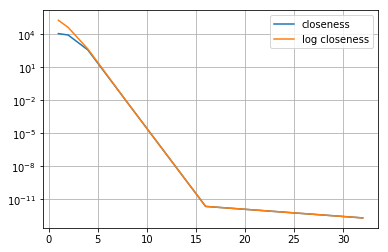

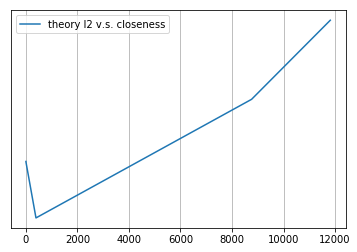

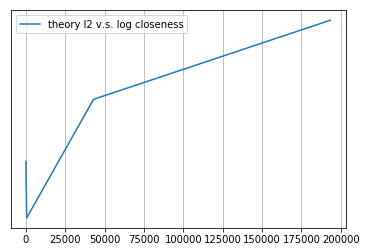

noise  100000.0 lamb  0.001


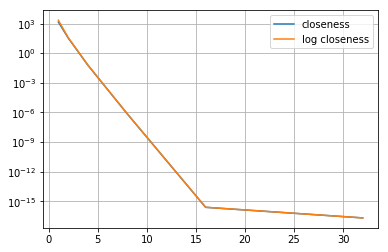

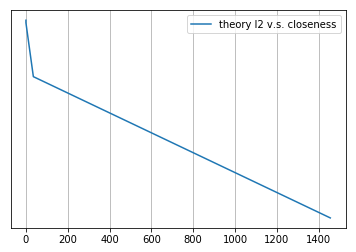

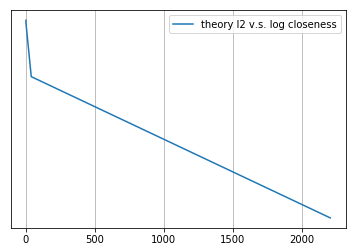

noise  100000.0 lamb  0.01


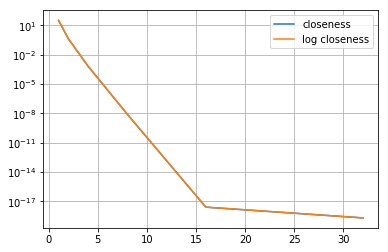

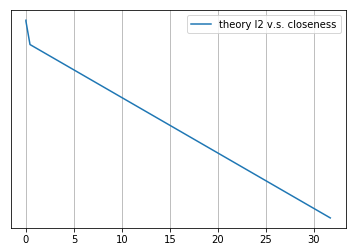

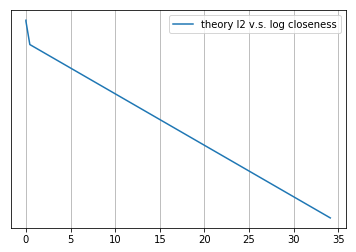

noise  100000.0 lamb  0.1


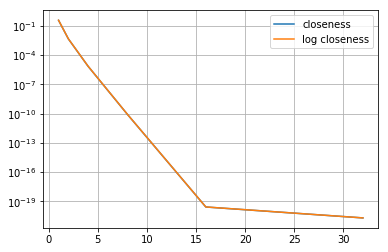

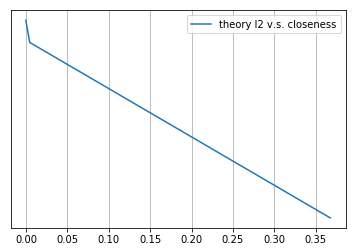

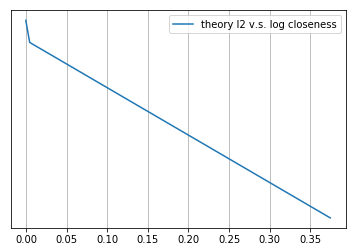

noise  100000.0 lamb  1.0


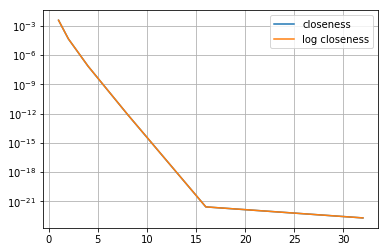

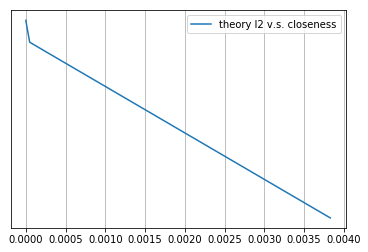

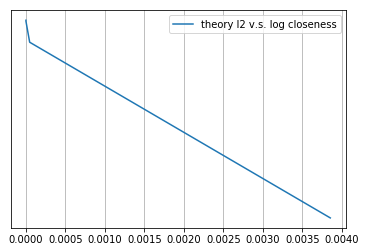

noise  100000.0 lamb  10.0


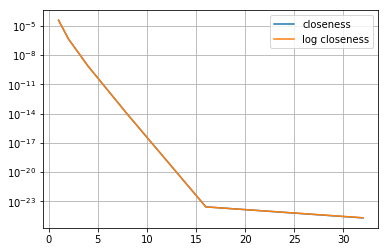

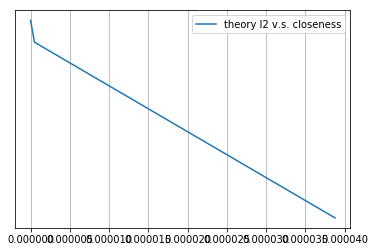

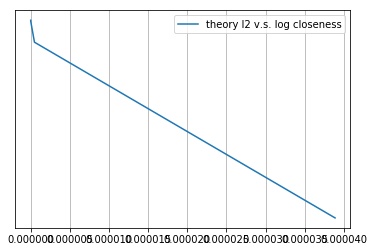

In [17]:
nbit_list = [1, 2, 4, 8, 16, 32]
lamb_list = [1e-6, 1e-5, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
noise_list = [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
for noise in noise_list:
    for lamb in lamb_list:
        print "noise ", noise, "lamb ", lamb
        closeness_list = []
        log_closeness_list = []
        theory_l2_list = []
        for nbit in nbit_list:
            S_bump = np.clip(S_baseline.copy(), 0, 1e20)
#             print "before ", S_bump
            # here memory budget = the # of fp layers
            S_bump += 2 / float(memory_budget) / (2**nbit - 1)**2
#             S_cut[int(keep_perc * dim):] = 0.0
        #     print int(keep_perc * dim)
#             print "after ", S_bump
            closeness_list.append(get_closeness(S_bump, S_baseline, lamb) )
            log_closeness_list.append(get_log_closeness(S_bump, S_baseline, lamb) )
            theory_l2_list.append(expected_loss(lamb, U, S_bump, Y, noise) )
        plt.figure()
#         print closeness_list
#         print log_closeness_list
#         print theory_l2_list
        plt.semilogy(nbit_list, closeness_list, label="closeness")
        plt.semilogy(nbit_list, log_closeness_list, label="log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()

        plt.figure()
#         plt.semilogy(nbit_list, theory_l2_list, label="theory l2 v.s. closeness")
        plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
        # plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()

        plt.figure()
        # plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
        plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()
        # print closeness_list
        # print log_closeness_list
        # print theory_l2_list
        # print len(closeness_list)
        # print len(log_closeness_list)
        # print len(theory_l2_list)
#     raw_input()